In [1]:
# Author: HG
# Date: 1/22/2021; Last edit dt:4/25/2021
# Purpose:  To Predict the onset of diabetes based on diagnostic measures 
# Problem Statement
# NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
# The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
# Build a model to accurately predict whether the patients in the dataset have diabetes or not.
# --------------------------------------------------------------------------
# Load Packages
# install.packages("SmartEDA")
#.libPaths("C:/Program Files/R/R-4.0.4/library")
# .libPaths()
library(tidyverse)
library(SmartEDA)
library(kableExtra)
library(IRdisplay)
# install.packages("SmartEDA")
# install.packages("kableExtra")
# install.packages("IRdisplay")

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'SmartEDA' was built under R version 4.0.5"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'kableExtra'


The following object is masked from 'package:dplyr':

    group_rows




1. Perform descriptive analysis. Understand the variables and their corresponding values

In [2]:
#-----------------------------
#setwd("I:/DSforR/capstone/")
#getwd()

# Lets create any new data frame object as df with a sequence # as suffix and 
# any additional relevant text post that

ds1_diabds <- read_csv("I:/DSforR/capstone/Project2/Healthcare-Diabetes/health care diabetes.csv")

#First step is understanding the overview of the given data -(1)
#Understanding the dimensions of the dataset, variable names, overall missing summary and data types of each variables

str(ds1_diabds)

#Overview of the data - Type = 1
kable(SmartEDA::ExpData(data=ds1_diabds,type=1), format = "html") %>%
toString() %>%
display_html() 

#Structure of the data - Type = 2
kable(ExpData(data=ds1_diabds,type=2)) %>% toString() %>%
display_html()

#Summary of all numeric variables
kableExtra::kable(ExpNumStat(ds1_diabds,gp="Outcome",Qnt=seq(0,1,0.1),MesofShape=2,Outlier=TRUE,round=2)) %>%
toString() %>%
display_html()

count((ds1_diabds %>% mutate(GlucoseGRP = ifelse(Glucose==0,"==0",">0"),
                                  BPGRP = ifelse(BloodPressure==0,"==0",">0"),
                              SkinThGRP = ifelse(SkinThickness==0,"==0",">0"),
                             InsulinGRP = ifelse(Insulin==0,"==0",">0"),
                                 BMIGRP = ifelse(BMI==0,"==0",">0"))),
      GlucoseGRP,
      BPGRP,
      SkinThGRP,
      InsulinGRP,
      BMIGRP)

#On the columns above, a value of zero does not make sense and thus indicates missing value:

# Skin Thickness and Insulin are almost 30-50% missing



-- Column specification --------------------------------------------------------
cols(
  Pregnancies = col_double(),
  Glucose = col_double(),
  BloodPressure = col_double(),
  SkinThickness = col_double(),
  Insulin = col_double(),
  BMI = col_double(),
  DiabetesPedigreeFunction = col_double(),
  Age = col_double(),
  Outcome = col_double()
)




spec_tbl_df[,9] [768 x 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Pregnancies             : num [1:768] 6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : num [1:768] 148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : num [1:768] 72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : num [1:768] 35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : num [1:768] 0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num [1:768] 33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num [1:768] 0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : num [1:768] 50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : num [1:768] 1 0 1 0 1 0 1 0 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   Pregnancies = col_double(),
  ..   Glucose = col_double(),
  ..   BloodPressure = col_double(),
  ..   SkinThickness = col_double(),
  ..   Insulin = col_double(),
  ..   BMI = col_double(),
  ..   DiabetesPedigreeFunction = co

Descriptions,Value
Sample size (nrow),768
No. of variables (ncol),9
No. of numeric/interger variables,9
No. of factor variables,0
No. of text variables,0
No. of logical variables,0
No. of identifier variables,0
No. of date variables,0
No. of zero variance variables (uniform),0
%. of variables having complete cases,100% (9)


Index,Variable_Name,Variable_Type,Sample_n,Missing_Count,Per_of_Missing,No_of_distinct_values
1,Pregnancies,numeric,768,0,0,17
2,Glucose,numeric,768,0,0,136
3,BloodPressure,numeric,768,0,0,47
4,SkinThickness,numeric,768,0,0,51
5,Insulin,numeric,768,0,0,186
6,BMI,numeric,768,0,0,248
7,DiabetesPedigreeFunction,numeric,768,0,0,517
8,Age,numeric,768,0,0,52
9,Outcome,numeric,768,0,0,2


,Vname,Group,TN,nNeg,nZero,nPos,NegInf,PosInf,NA_Value,Per_of_Missing,sum,min,max,mean,median,SD,CV,IQR,Skewness,Kurtosis,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,LB.25%,UB.75%,nOutliers
8,Age,All,768,0,0,768,0,0,0,0,25529.0,21.00,81.00,33.24,29.00,11.76,0.35,17.00,1.13,0.63,21.00,22.00,23.00,25.00,27.0,29.00,33.00,38.00,42.60,51.00,81.00,-1.50,66.50,9
3,BloodPressure,All,768,0,35,733,0,0,0,0,53073.0,0.00,122.00,69.11,72.00,19.36,0.28,18.00,-1.84,5.14,0.00,54.00,60.00,64.00,68.0,72.00,74.00,78.00,82.00,88.00,122.00,35.00,107.00,45
6,BMI,All,768,0,11,757,0,0,0,0,24570.3,0.00,67.10,31.99,32.00,7.88,0.25,9.30,-0.43,3.26,0.00,23.60,25.90,28.20,30.1,32.00,33.70,35.49,37.80,41.50,67.10,13.35,50.55,19
7,DiabetesPedigreeFunction,All,768,0,0,768,0,0,0,0,362.4,0.08,2.42,0.47,0.37,0.33,0.70,0.38,1.92,5.55,0.08,0.16,0.22,0.26,0.3,0.37,0.45,0.56,0.69,0.88,2.42,-0.33,1.20,29
2,Glucose,All,768,0,5,763,0,0,0,0,92847.0,0.00,199.00,120.89,117.00,31.97,0.26,41.25,0.17,0.63,0.00,85.00,95.00,102.00,109.0,117.00,125.00,134.00,147.00,167.00,199.00,37.12,202.12,5
5,Insulin,All,768,0,374,394,0,0,0,0,61286.0,0.00,846.00,79.80,30.50,115.24,1.44,127.25,2.27,7.16,0.00,0.00,0.00,0.00,0.0,30.50,72.20,106.00,150.00,210.00,846.00,-190.88,318.12,34
1,Pregnancies,All,768,0,111,657,0,0,0,0,2953.0,0.00,17.00,3.85,3.00,3.37,0.88,5.00,0.90,0.15,0.00,0.00,1.00,1.00,2.0,3.00,4.00,5.00,7.00,9.00,17.00,-6.50,13.50,4
4,SkinThickness,All,768,0,227,541,0,0,0,0,15772.0,0.00,99.00,20.54,23.00,15.95,0.78,32.00,0.11,-0.52,0.00,0.00,0.00,8.20,18.0,23.00,27.00,31.00,35.00,40.00,99.00,-48.00,80.00,1


GlucoseGRP,BPGRP,SkinThGRP,InsulinGRP,BMIGRP,n
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
==0,>0,>0,==0,>0,4
==0,>0,>0,>0,>0,1
>0,==0,==0,==0,==0,7
>0,==0,==0,==0,>0,26
>0,==0,>0,==0,>0,2
>0,>0,==0,==0,==0,2
>0,>0,==0,==0,>0,192
>0,>0,>0,==0,==0,1
>0,>0,>0,==0,>0,140


#### On the columns above, a value of zero (except but for Pregnancies column), does not make sense and thus indicates missing value:

# Skin Thickness and Insulin are almost 30-50% missing

Since our goal is to predict diabetes and Insulin is a key variable related to diabetes, we can't drop this variable. Instead of dropping this variable and skin thickness, we can use the median value to replace missing values, along with the other independent variabe's missing values (over here depicted by 0) replaced by their medians. <ins> There is a lot of Standard deviation in the insulin's value and the mean vs median are distinctly different, indicating there are significant outliers (# count of 34 from the above table) and hence we are resorting to using median to replace the missing values, as it is a better central tendency. </ins>

There are 768 observations with 9 main variables. Independent variables ~ Pregnancies , Glucose, Blood Pressure, Skin Thickness, Insulin, BMI , DiabetesPedigree Function , Age ; Dependent Variable = Outcome. 
Median age of patients is 29 with minimum being 21 and maximum 81. Median value of the other independent variables ~  BMI = 32 , BP = 72, DPF = 0.37, Glucose = 117, Insulin = 30.5, Preg = 3  , ST = 23 ;

Note: 1) For pregnancies , I am not planning to change the 0 value with the median as it is possible for some people not to have been pregnant at all 
      2) R is weakly typed and has only numeric and character types as opposed to the full fledged data types in Python.So based on the questions for week 1 all the data types are numeric as per this dataset and the counts are 768 for each variable


$`0`


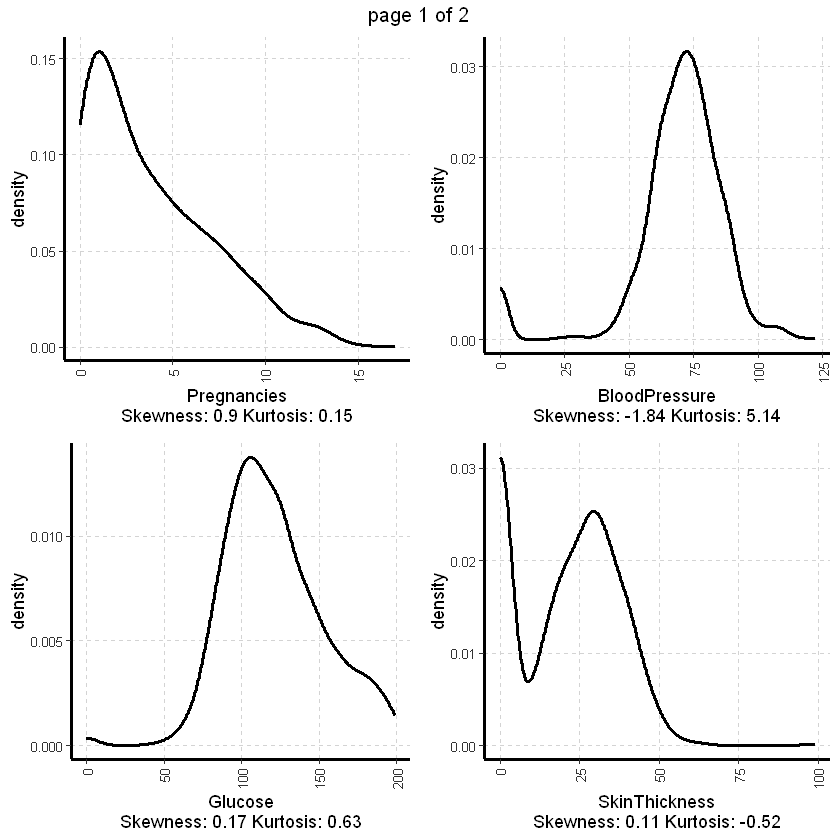

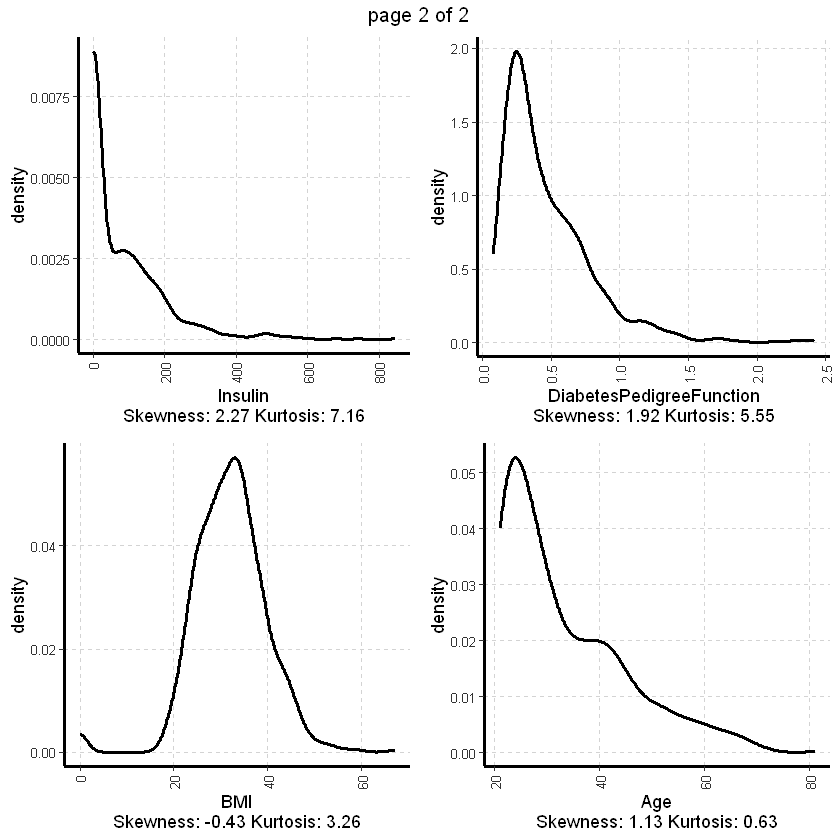

$`0`


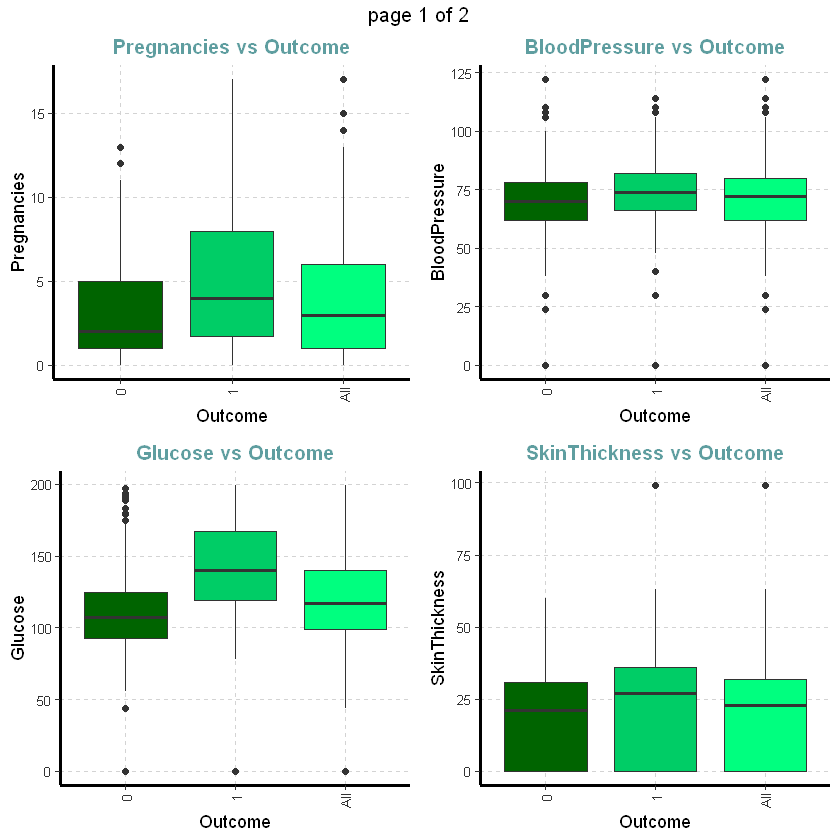

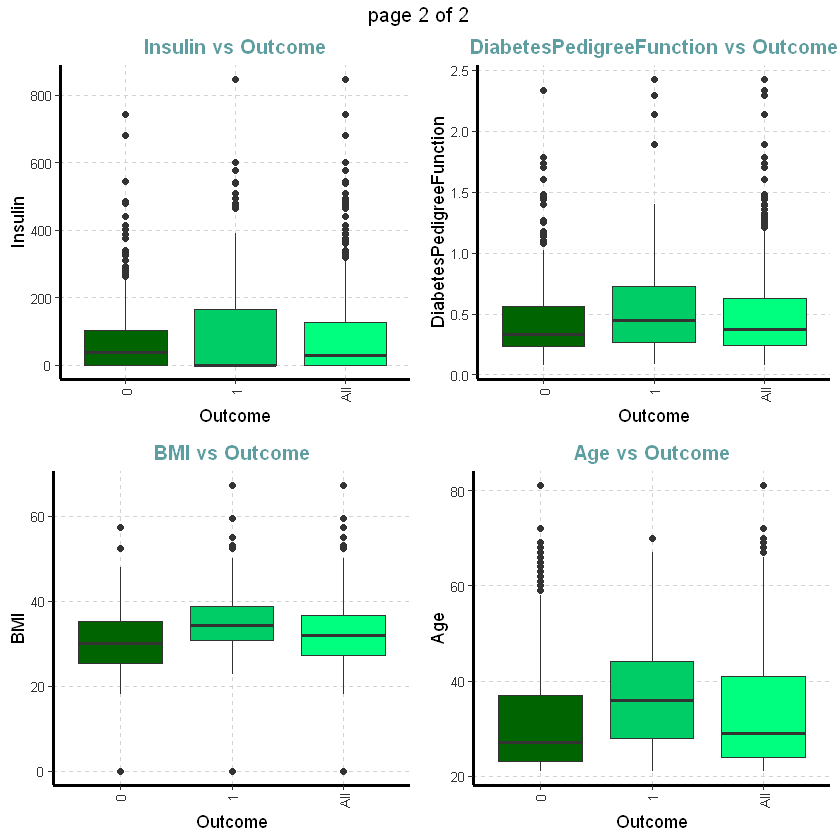

In [3]:

# Distributions of numerical variables
# Graphical representation of all numeric features

# Density plot (Univariate)
# Note: Variable excluded (if unique value of variable which is less 
# than or eaual to 10 [nlim=10])
plot1 <- ExpNumViz(ds1_diabds,target=NULL,nlim=10,Page=c(2,2),sample=8)

plot1

# Next we are going to explore the Outcome variable with regards to other continuous values

plot2 <- ExpNumViz(ds1_diabds,target="Outcome",type=1,nlim=3,fname=NULL,col=c("darkgreen","springgreen3","springgreen1"),Page=c(2,2),sample=8)
plot2

#Information Value

# ExpCatStat(ds1_diabds,Target="Outcome",result = "IV",clim=10,
#            nlim=5,bins=10,Pclass="Yes",plot=FALSE,top=20,Round=2)
# 
# ExpCatStat(ds1_diabds,Target="Outcome",result = "IV",clim=10,
#            nlim=5,bins=5,Pclass="Yes",plot=FALSE,top=20,Round=2)

# # Statistical test
# 
# et4 <- ExpCatStat(ds1_diabds,Target="Outcome",result = "Stat",
#                   clim=10,nlim=5,bins=10,Pclass="Yes",plot=FALSE,top=20,Round = 2)
# 
# et4

# Variable importance based on Information value
# 
# varimp <- ExpCatStat(ds1_diabds,Target="Outcome",result = "Stat",
#                      clim=10,nlim=5,bins=10,Pclass="Yes",plot=TRUE,top=10,Round = 2)





In [5]:
ds1_diabds_mod <- na_if(dplyr::select(ds1_diabds,-c("Pregnancies","Outcome")),0) %>%
                        mutate_all(~ifelse(is.na(.x), median(.x, na.rm = TRUE), .x)) 

ds1_diabds_mod <- ds1_diabds_mod %>% mutate(SNO = 1:n()) %>% left_join(ds1_diabds %>% dplyr::select(Pregnancies,Outcome) %>%
                                                                      mutate(SNO = 1:n()))
summary(ds1_diabds_mod) # we can now see that none of the 7 columns excl Pregnancies are 0
nrow(ds1_diabds_mod)

Joining, by = "SNO"



    Glucose       BloodPressure    SkinThickness      Insulin     
 Min.   : 44.00   Min.   : 24.00   Min.   : 7.00   Min.   : 14.0  
 1st Qu.: 99.75   1st Qu.: 64.00   1st Qu.:25.00   1st Qu.:121.5  
 Median :117.00   Median : 72.00   Median :29.00   Median :125.0  
 Mean   :121.66   Mean   : 72.39   Mean   :29.11   Mean   :140.7  
 3rd Qu.:140.25   3rd Qu.: 80.00   3rd Qu.:32.00   3rd Qu.:127.2  
 Max.   :199.00   Max.   :122.00   Max.   :99.00   Max.   :846.0  
      BMI        DiabetesPedigreeFunction      Age             SNO       
 Min.   :18.20   Min.   :0.0780           Min.   :21.00   Min.   :  1.0  
 1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00   1st Qu.:192.8  
 Median :32.30   Median :0.3725           Median :29.00   Median :384.5  
 Mean   :32.46   Mean   :0.4719           Mean   :33.24   Mean   :384.5  
 3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00   3rd Qu.:576.2  
 Max.   :67.10   Max.   :2.4200           Max.   :81.00   Max.   :768.0  
  Pregnancies

[1] 768

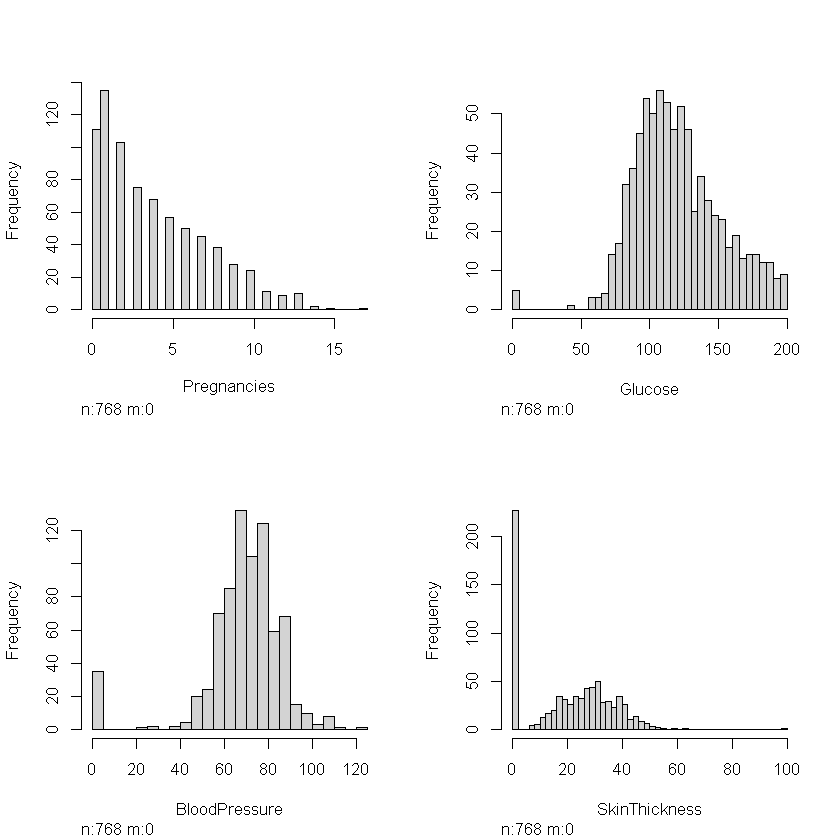

In [6]:
# install.packages("Hmisc")
# Histogram of the dependent variables before changing the 0 values to median <Week 1 Q2> 
# the values at 0 act as outliers before replacing them by medians for all of these except pregnancies
Hmisc::hist.data.frame(ds1_diabds %>% select(1:4))

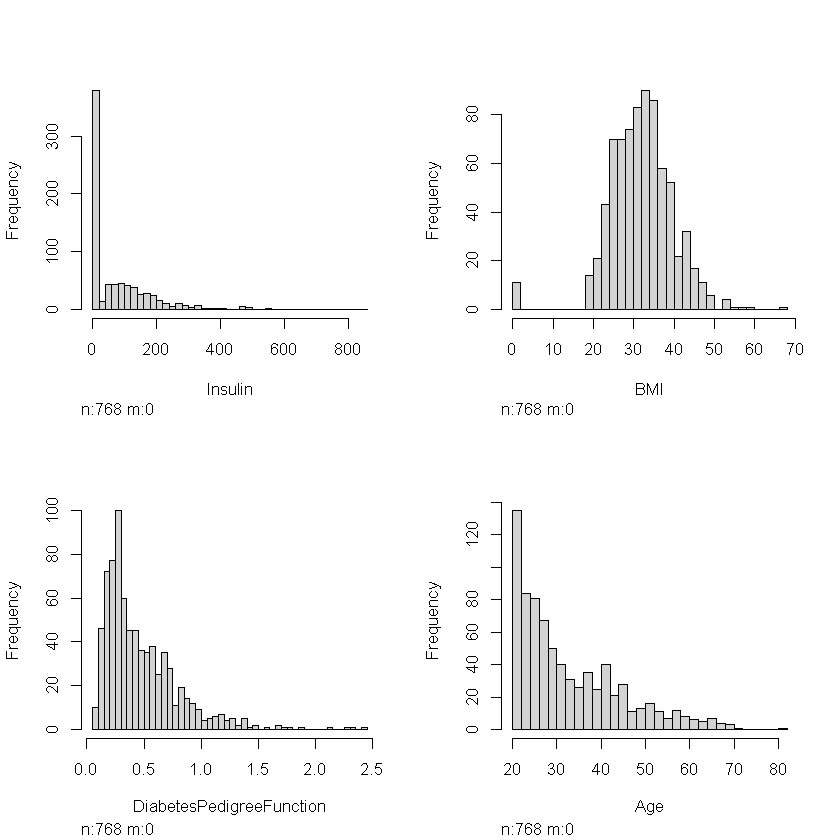

In [7]:
Hmisc::hist.data.frame(ds1_diabds %>% select(5:8))

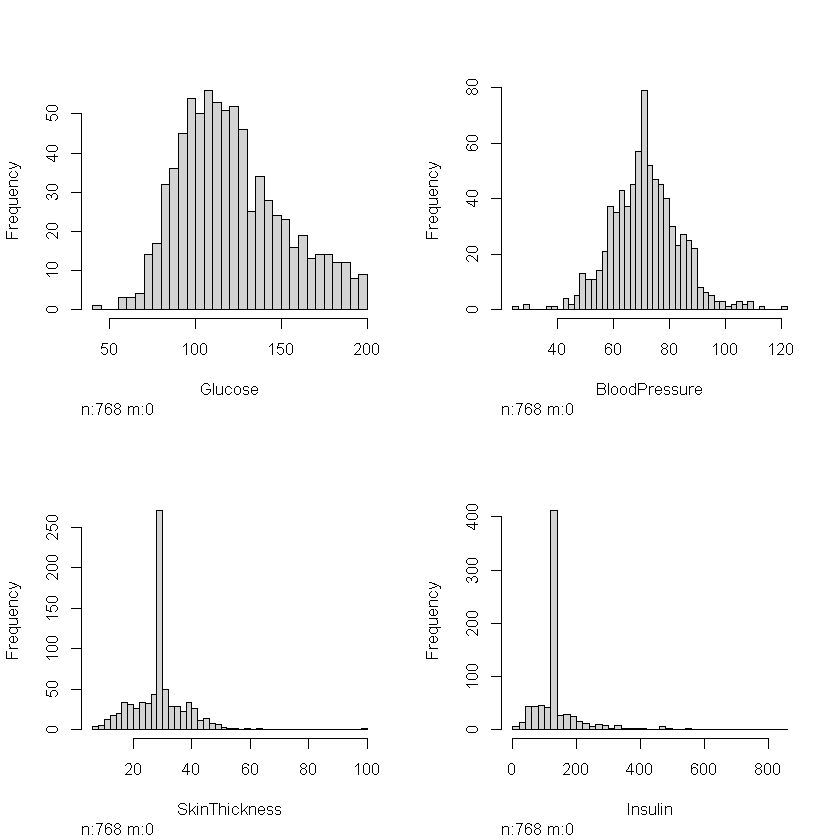

In [8]:
# Histogram of the dependent variables after changing the 0 values to median <Week 1 Q2>
Hmisc::hist.data.frame(ds1_diabds_mod %>% select(1:4))

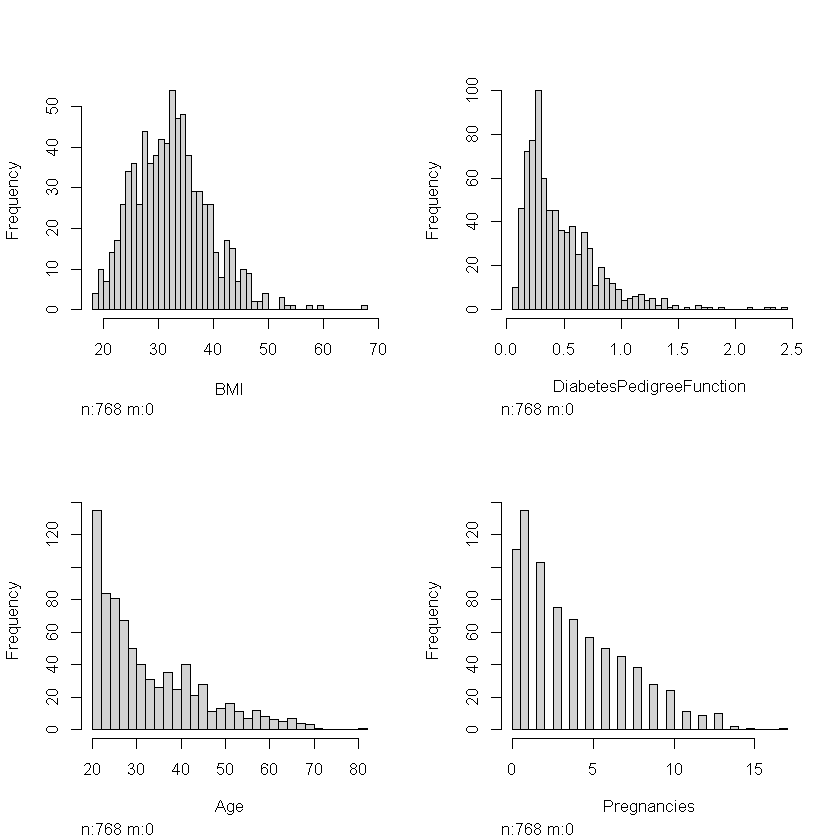

In [9]:
# Histogram of the dependent variables after changing the 0 values to median <Week 1 Q2>
Hmisc::hist.data.frame(ds1_diabds_mod %>% select(5:7,9))

----- ## Week 2 analysis checkpoint starts here ----
1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

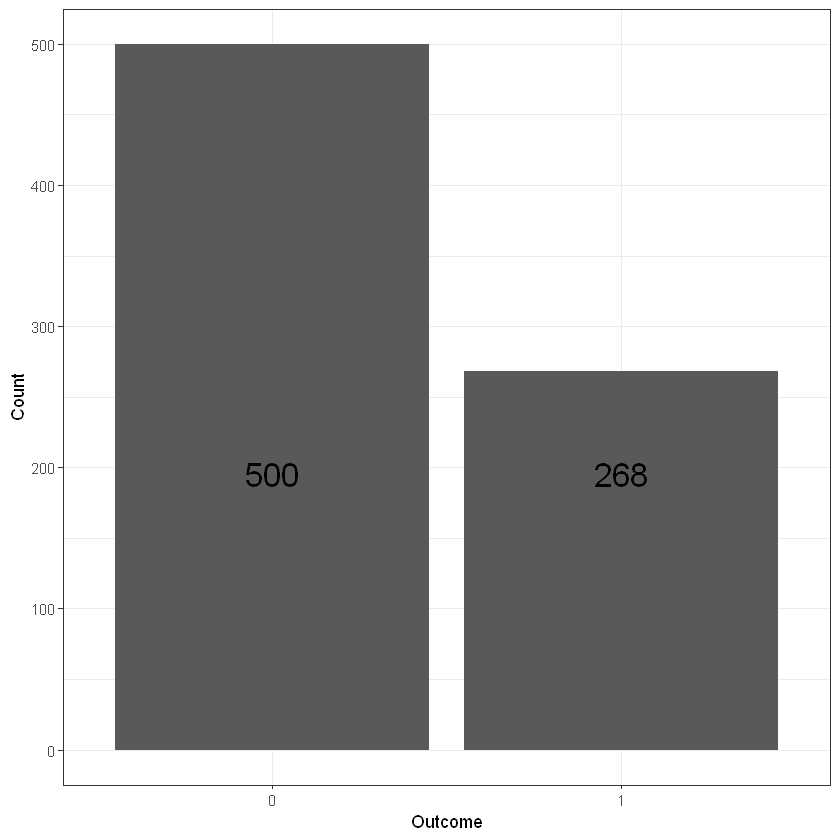

In [10]:
ggplot(data = ds1_diabds_mod, aes(x=factor(Outcome))) +
geom_bar()+ theme_bw()+ xlab("Outcome") + ylab("Count") +
geom_text(aes(label = ..count..), stat = "count", position = "fill", vjust = -10.5, size = 7)

## There is a very high difference between the count of outcome values 1 (Minority~ 35% or n=268) and 0 (Majority ~ 65% or n=500).    ## Hence we can say our dataset is Imbalanced Dataset.

<ins> Techniques to Convert Imbalanced Dataset into Balanced Dataset </ins> <br> 
1) Using the right evaluation metrics (either of these can be used): <br>
a) Confusion Matrix: a table showing correct predictions and types of incorrect predictions. <br>
b) Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives. <br>
c) Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives. <br>
d) F1-Score: the weighted average of precision and recall. <br>
2) We can also do Feature selection - identify the significant features from each class based on information gain, odds ratio or correlation coefficient. <br>
3) Another possible solution is using Ensemble Learning Techniques (Bagging, Boosting, etc.)- combining the result or performance of several classiﬁers to improve the performance of single classiﬁer. <br>
4) We can also do Upsampling (over sampling) and/or Downsampling (under sampling) to treat imbalanced dataset - For the 1's which is insufficient, the oversampling method tries to balance the dataset by incrementing the size of rare samples (1) or . Under-sampling, on contrary , aims to reduce the number of majority samples (0) to balance the Outcome class distribution. But the issue with using either of these to counter imbalanced dataset is that we may encounter over-fitting (in upsampling) or loss of important/useful information (in downsampling). <br>

The course of action which we are going to see in this project is first looking for correlated variables and remove redundant features if very strong correlation is found, apply some automated feature selection technique provided by caret package and then use the above evaluation metrics and also look at ROC curves etc eventually. <br>

We can rank the Features by Importance and also perform feature selection using Caret R Package .The automatic method for feature selection provided by the caret R package is called Recursive Feature Elimination or RFE.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



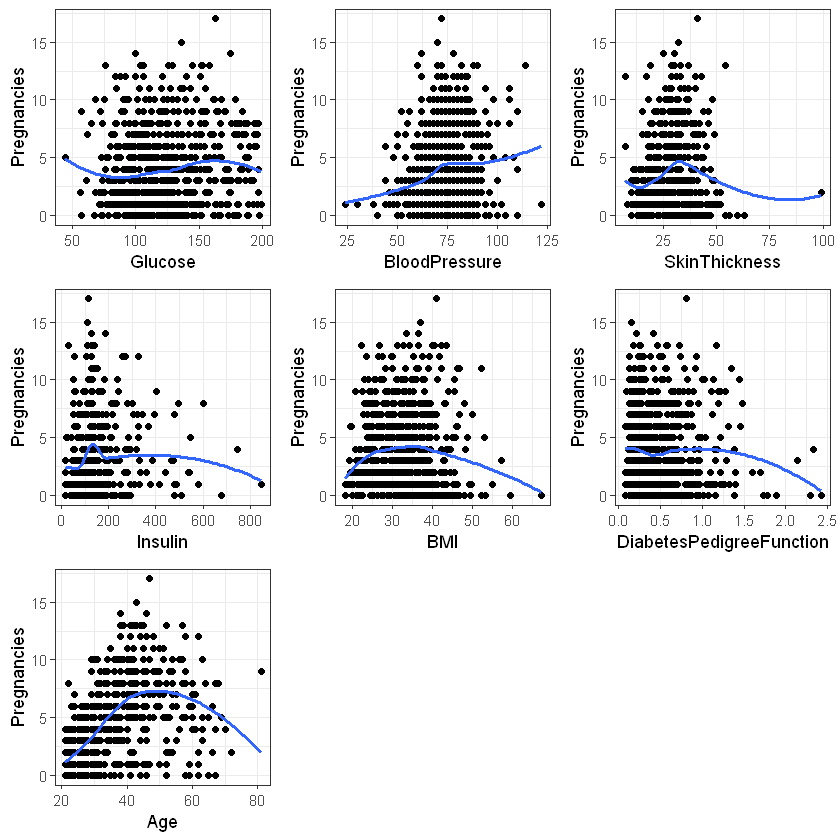

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



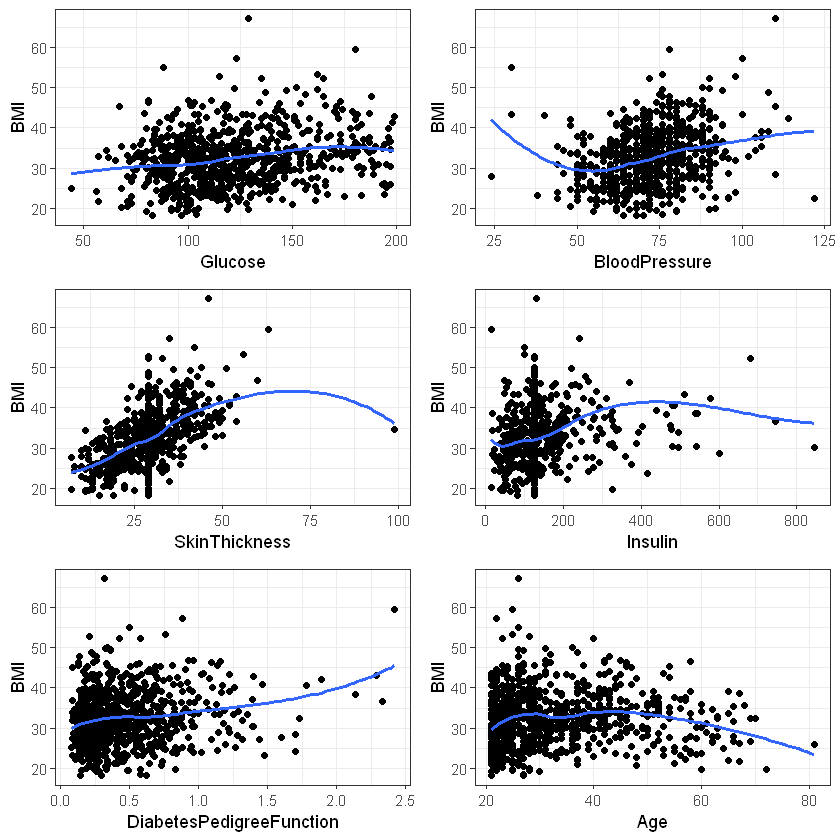

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



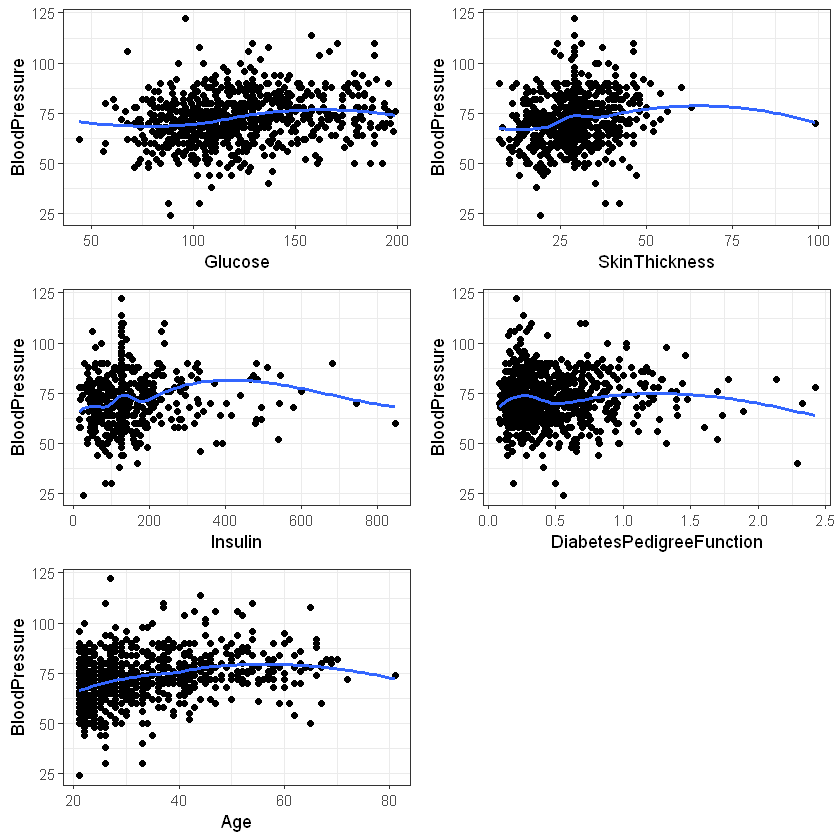

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



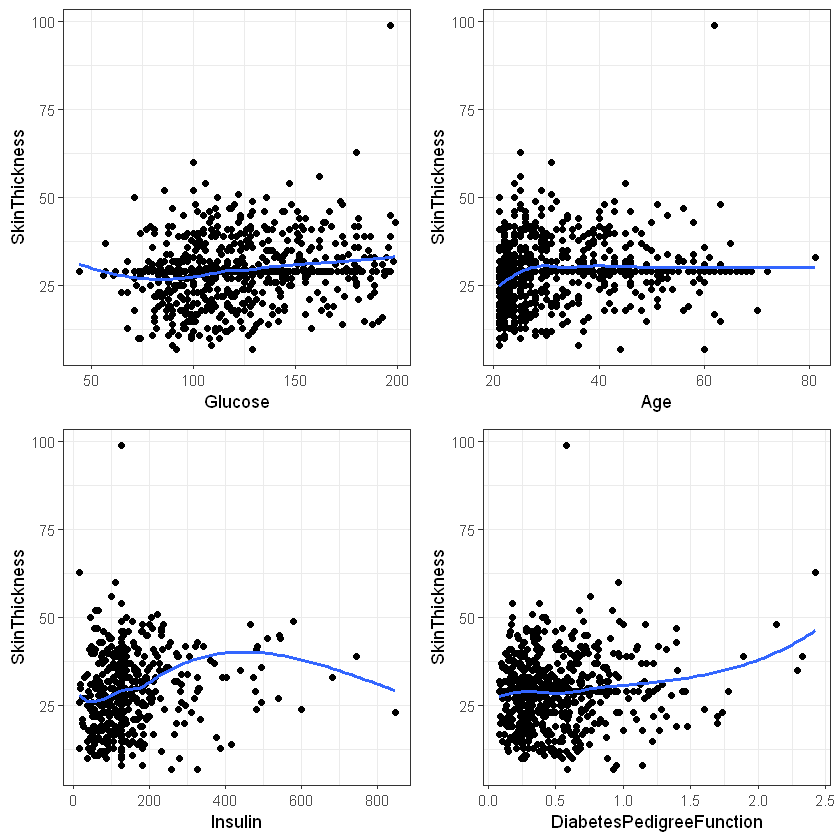

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



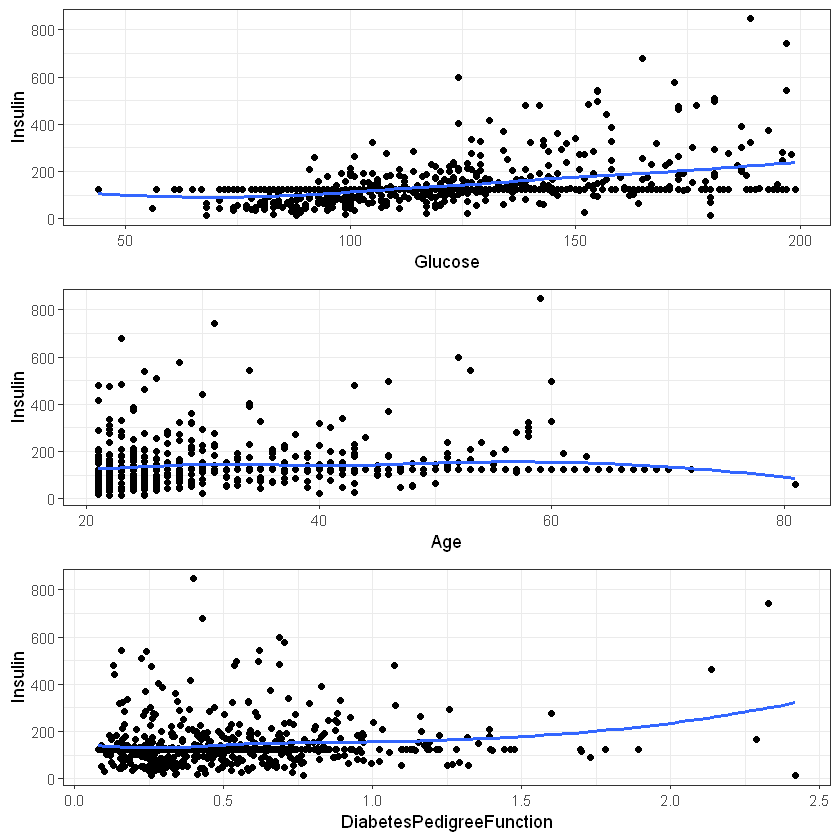

`geom_smooth()` using formula 'y ~ x'



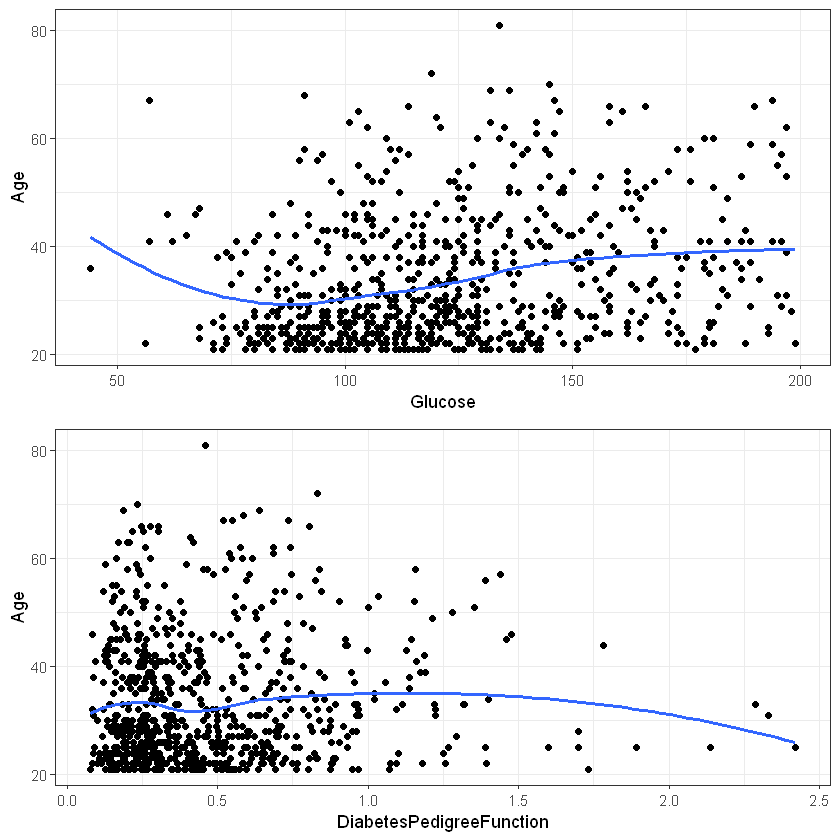

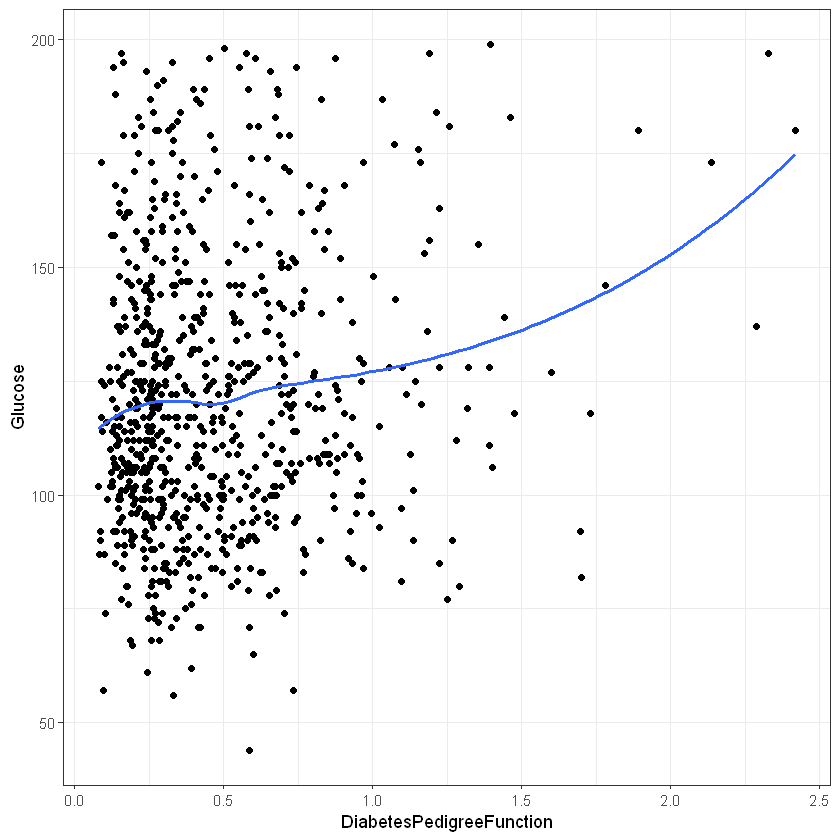

In [35]:
library(gridExtra)
#scatter plots below - there are a few tha are positively correlated (we can see the correlation plots after the scatter plots)
# BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age
Preg1_scat <- ggplot(data = ds1_diabds_mod, aes(y=Pregnancies,x=Glucose)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Preg2_scat <- ggplot(data = ds1_diabds_mod, aes(y=Pregnancies,x=BloodPressure)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Preg3_scat <- ggplot(data = ds1_diabds_mod, aes(y=Pregnancies,x=SkinThickness)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Preg4_scat <- ggplot(data = ds1_diabds_mod, aes(y=Pregnancies,x=Insulin)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Preg5_scat <- ggplot(data = ds1_diabds_mod, aes(y=Pregnancies,x=BMI)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Preg6_scat <- ggplot(data = ds1_diabds_mod, aes(y=Pregnancies,x=DiabetesPedigreeFunction)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Preg7_scat <- ggplot(data = ds1_diabds_mod, aes(y=Pregnancies,x=Age)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BMI1_scat <- ggplot(data = ds1_diabds_mod, aes(y=BMI,x=Glucose)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BMI2_scat <- ggplot(data = ds1_diabds_mod, aes(y=BMI,x=BloodPressure)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BMI3_scat <- ggplot(data = ds1_diabds_mod, aes(y=BMI,x=SkinThickness)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BMI4_scat <- ggplot(data = ds1_diabds_mod, aes(y=BMI,x=Insulin)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BMI5_scat <- ggplot(data = ds1_diabds_mod, aes(y=BMI,x=DiabetesPedigreeFunction)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BMI6_scat <- ggplot(data = ds1_diabds_mod, aes(y=BMI,x=Age)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BP1_scat <- ggplot(data = ds1_diabds_mod, aes(y=BloodPressure,x=Glucose)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BP2_scat <- ggplot(data = ds1_diabds_mod, aes(y=BloodPressure,x=SkinThickness)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BP3_scat <- ggplot(data = ds1_diabds_mod, aes(y=BloodPressure,x=Insulin)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BP4_scat <- ggplot(data = ds1_diabds_mod, aes(y=BloodPressure,x=DiabetesPedigreeFunction)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

BP5_scat <- ggplot(data = ds1_diabds_mod, aes(y=BloodPressure,x=Age)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

ST1_scat <- ggplot(data = ds1_diabds_mod, aes(y=SkinThickness,x=Glucose)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

ST2_scat <- ggplot(data = ds1_diabds_mod, aes(y=SkinThickness,x=Age)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

ST3_scat <- ggplot(data = ds1_diabds_mod, aes(y=SkinThickness,x=Insulin)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

ST4_scat <- ggplot(data = ds1_diabds_mod, aes(y=SkinThickness,x=DiabetesPedigreeFunction)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Insulin1_scat <- ggplot(data = ds1_diabds_mod, aes(y=Insulin,x=Glucose)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Insulin2_scat <- ggplot(data = ds1_diabds_mod, aes(y=Insulin,x=Age)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Insulin3_scat <- ggplot(data = ds1_diabds_mod, aes(y=Insulin,x=DiabetesPedigreeFunction)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Age1_scat <- ggplot(data = ds1_diabds_mod, aes(y=Age,x=Glucose)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Age2_scat <- ggplot(data = ds1_diabds_mod, aes(y=Age,x=DiabetesPedigreeFunction)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

Gluc2_scat <- ggplot(data = ds1_diabds_mod, aes(y=Glucose,x=DiabetesPedigreeFunction)) +
geom_point()+ theme_bw()+
geom_smooth(se=FALSE, method="loess")

grid.arrange(Preg1_scat,Preg2_scat,Preg3_scat,Preg4_scat,Preg5_scat,Preg6_scat,Preg7_scat)
grid.arrange(BMI1_scat,BMI2_scat,BMI3_scat,BMI4_scat,BMI5_scat,BMI6_scat)
grid.arrange(BP1_scat,BP2_scat,BP3_scat,BP4_scat,BP5_scat)
grid.arrange(ST1_scat,ST2_scat,ST3_scat,ST4_scat)
grid.arrange(Insulin1_scat,Insulin2_scat,Insulin3_scat)
grid.arrange(Age1_scat,Age2_scat)
grid.arrange(Gluc2_scat)



In [13]:
# calculate correlation matrix
correlationMatrix <- cor((ds1_diabds_mod %>% select(-SNO))[,c(1:9)])
#ds1_diabds_mod

In [14]:
correlationMatrix

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.0000000,0.218937186,0.19261490,0.41945051,0.23104855,0.137326919,0.26690916,0.12821296,0.4927824
BloodPressure,0.2189372,1.000000000,0.19189239,0.04536330,0.28125656,-0.002378336,0.32491539,0.20861541,0.1657229
SkinThickness,0.1926149,0.191892388,1.00000000,0.15561028,0.54320507,0.102188267,0.12610719,0.08176982,0.2148732
Insulin,0.4194505,0.045363305,0.15561028,1.00000000,0.18024114,0.126503086,0.09710125,0.02504748,0.2037903
BMI,0.2310486,0.281256564,0.54320507,0.18024114,1.00000000,0.153437673,0.02559691,0.02155873,0.3120383
DiabetesPedigreeFunction,0.1373269,-0.002378336,0.10218827,0.12650309,0.15343767,1.000000000,0.03356131,-0.03352267,0.1738441
Age,0.2669092,0.324915391,0.12610719,0.09710125,0.02559691,0.033561312,1.00000000,0.54434123,0.2383560
Pregnancies,0.1282130,0.208615412,0.08176982,0.02504748,0.02155873,-0.033522673,0.54434123,1.00000000,0.2218982
Outcome,0.4927824,0.165722913,0.21487322,0.20379034,0.31203834,0.173844066,0.23835598,0.22189815,1.0000000


Warning message:
"package 'caret' was built under R version 4.0.5"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




[1] 5 7

Warning message:
"package 'corrplot' was built under R version 4.0.5"
corrplot 0.84 loaded



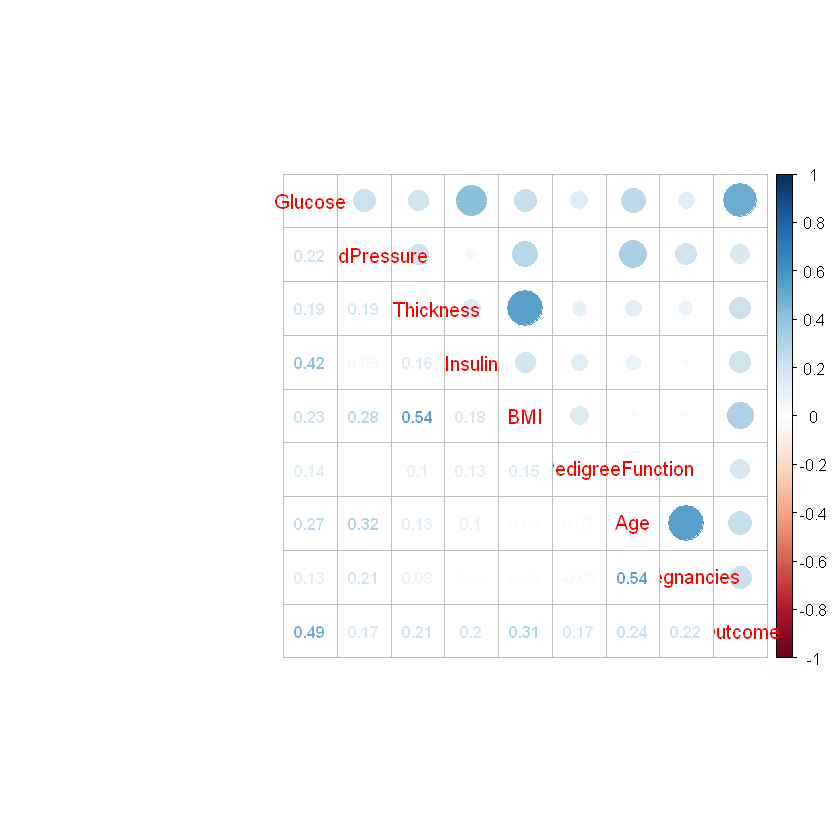

In [15]:
# install.packages("caret")
library(caret)
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.5)
highlyCorrelated # indexes of highly correlated attributes

# Sys.which("make")
#install.packages("usethis")
##library(usethis)
#install.packages("devtools")
#devtools::install_github("taiyun/corrplot", build_vignettes = TRUE)
#install.packages("corrplot")
library(corrplot)
# Heatmap of the correlation plot
corrplot.mixed(correlationMatrix,number.cex= 7/ncol(ds1_diabds))

Technically we would want to remove the highly correlated terms with correlation greater than 0.7 or 0.75 but in this dataset we have two columns with moderate/marginal value i.e 0.54 as the correlation which is the max value of correlated terms between the independent variables. BMI is relatively highly correlated with Skin Thickness and Age with Pregnancies; So using one of these correlated terms in the model may mostly suffice. We could use either of the two correlated interchangably as they are confounded but which actually makes more clinical relevance needs to be figured. Since some diabetes actually involves due to pregnancies, we can choose to drop age feature from analysis and pregnancies will be more apt for analysis clinically. But lets try using the automatic feature selection by caretmethod instead of manually dropping the variable manually. Had it had a very strong correlation, we could have dropped one of the columns manually even before using the automatic feature selection. A popular automatic method for feature selection provided by the caret R package is called Recursive Feature Elimination or RFE.

Cross Validation - A technique for evaluating ML models by training several models on subsets of data. It is used to prevent over-fitting.

Recursive Feature Elimination is a backward selection of predictors; It begins by building a model on the entire set of predictors and computing an importance score for each predictor. The least important predictors are removed and model is rebuilt and importance scores are computed again. Hence, it is recursive.

Warning message:
"package 'mlbench' was built under R version 4.0.5"
Warning message:
"package 'e1071' was built under R version 4.0.5"



Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.7096 0.3011    0.04224 0.10808         
         2   0.7498 0.4310    0.03898 0.08681         
         3   0.7500 0.4419    0.03480 0.06941         
         4   0.7564 0.4566    0.04584 0.09664         
         5   0.7616 0.4670    0.03566 0.07491         
         6   0.7656 0.4702    0.02383 0.06186         
         7   0.7656 0.4704    0.02090 0.05413         
         8   0.7786 0.4966    0.02825 0.08080        *

The top 5 variables (out of 8):
   Glucose, BMI, Age, Insulin, Pregnancies


[1] "Glucose"                  "BMI"                     
[3] "Age"                      "Insulin"                 
[5] "Pregnancies"              "DiabetesPedigreeFunction"
[7] "SkinThickness"            "BloodPressure"

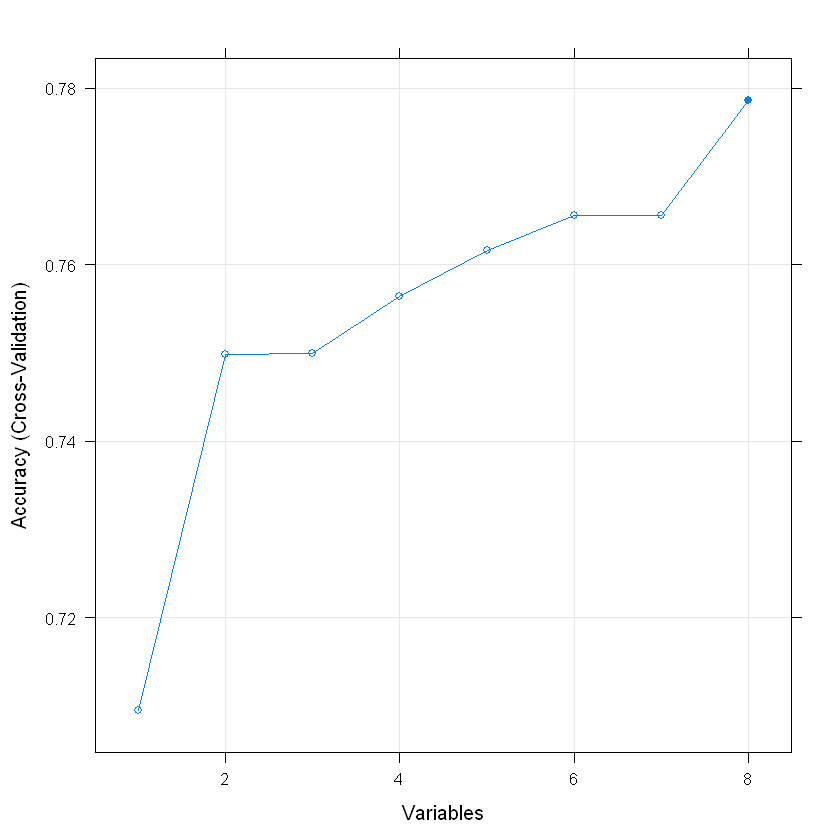

In [16]:
set.seed(123)
# load the library
library(mlbench)
library(caret)
#install.packages("e1071")
library(e1071)
#install.packages("randomForest")
#library(randomForest)
control <- rfeControl(functions=rfFuncs, method="cv", number=10) # defining the control using ~ random forest selection

arg1 <- as.data.frame((ds1_diabds_mod %>% select(-SNO))[,(1:8)])
arg2 <- as.data.frame(ds1_diabds_mod %>% select(10)) 
names(arg2) = "Outcome"
arg2 <- arg2 %>% mutate(Outcome = factor(Outcome))

results <- rfe(arg1, 
               arg2[,1], #without calling arg2[,1] we can encounter err: there should be the same number of samples in x and y
               sizes=c(1:8), rfeControl=control) # run the RFE algorithm

results

predictors(results) # chosen features list

plot(results, type = c("g","o"))

### From the above plot we see that we can perhaps choose all 8 variables as the accuracy is close to max using all variables.

#####1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
#####2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

We will be overestimating the model performance if we assess the performance of a model using the same dataset that was used to fit the model. So we need to split the data and use one part to fit the model and the other one to test it. In ML , the data used to fit the model is the training data and the data that is used to assess the model performance is the test data. We will be using K-fold cross-validation as mentioned above to avoid over-fitting. It is one of the model validation techniques.In k-fold cross-validation, the data is divided into k folds. The model is trained on k-1 folds with one fold used for testing. The process is repeated to ensure each fold of the dataset gets the chance to be the test set. Once the process is completed, we can summarize the evaluation metric using the mean/median and/or the standard deviation. If we just split the data into one train and test set, the presence of an outlier can change vastly an out of sample RMSE (root mean sq error). So a better approach is using multiple train test splits and averaging out of sample error using CV. But over here, we take a step further and develop train and test sets and then on top do the cross validation in the training set to reduce further error.

Having a lower K means less variance and thus, more bias, while having a higher K means more variance and thus, and lower bias.

Also, we should keep in mind the computational costs for the different values. High K means more folds, thus higher computational time and vice versa. So, we need to find an optimal spot between those by doing a hyperparameter tuning analysis. There is an automatic hyperparameter tuning provided by caret package for random forest algorithm. 
There are many classification algorithms such as logistic regression, support vector machine, naive Bayes classifier, decision trees and Random Forest. Since caret package handles automatic hyperparameter tuning, lets focus on Random Forest first.

Random Forest - The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by the group of trees is more accurate than that of any individual tree.

In [17]:
ds1_diabds_mod2 <- ds1_diabds_mod %>% mutate(Outcome = as.factor(Outcome))
table(ds1_diabds_mod2$Outcome)

levels(ds1_diabds_mod2$Outcome) <- c("No","Yes")

table(ds1_diabds_mod2$Outcome)

set.seed(123456)
partitionRule = createDataPartition(ds1_diabds_mod2$Outcome, p= 0.7, list=F) #70 percent into training, 30 % into test
trainingSet <-ds1_diabds_mod2[partitionRule,]
testSet <- ds1_diabds_mod2[-partitionRule,]

str(trainingSet)
str(testSet)



  0   1 
500 268 


 No Yes 
500 268 

tibble[,10] [538 x 10] (S3: tbl_df/tbl/data.frame)
 $ Glucose                 : num [1:538] 85 89 116 78 125 110 168 139 189 166 ...
 $ BloodPressure           : num [1:538] 66 66 74 50 96 92 74 80 60 72 ...
 $ SkinThickness           : num [1:538] 29 23 29 32 29 29 29 29 23 19 ...
 $ Insulin                 : num [1:538] 125 94 125 88 125 125 125 125 846 175 ...
 $ BMI                     : num [1:538] 26.6 28.1 25.6 31 32.3 37.6 38 27.1 30.1 25.8 ...
 $ DiabetesPedigreeFunction: num [1:538] 0.351 0.167 0.201 0.248 0.232 ...
 $ Age                     : num [1:538] 31 21 30 26 54 30 34 57 59 51 ...
 $ SNO                     : int [1:538] 2 4 6 7 10 11 12 13 14 15 ...
 $ Pregnancies             : num [1:538] 1 1 5 3 8 4 10 10 1 5 ...
 $ Outcome                 : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 2 1 2 2 ...
tibble[,10] [230 x 10] (S3: tbl_df/tbl/data.frame)
 $ Glucose                 : num [1:230] 148 183 137 115 197 147 88 92 138 180 ...
 $ BloodPressure           : num [1:2

In [18]:

# K-fold cross-validation
  
# setting seed to generate a 
# reproducible random sampling
set.seed(125) 
  
# defining training control
# as cross-validation and 
# value of K equal to 10
train_control <- trainControl(method = "repeatedcv",
                              number = 10, search ="random", repeats =3, 
                              savePredictions=T,classProbs = TRUE, 
  summaryFunction = twoClassSummary,
              verboseIter = TRUE)
  
# in order to use the ROC metric, we have to add summaryFunction = twoClassSummary

set.seed(125) 
# training the model by assigning Output column
# as target variable and rest other column
# as independent varaible
rfmodel <- train(Outcome ~.-SNO, data = trainingSet , 
               method = "rf",
               trControl = train_control, 
               preProc = c("center", "scale"),
               ntree = 500, tuneLength =10,
              metric="ROC")
  
# printing model performance metrics
# along with other details
print(rfmodel)

+ Fold01.Rep1: mtry=7 
- Fold01.Rep1: mtry=7 
+ Fold01.Rep1: mtry=8 
- Fold01.Rep1: mtry=8 
+ Fold01.Rep1: mtry=3 
- Fold01.Rep1: mtry=3 
+ Fold01.Rep1: mtry=1 
- Fold01.Rep1: mtry=1 
+ Fold01.Rep1: mtry=4 
- Fold01.Rep1: mtry=4 
+ Fold01.Rep1: mtry=6 
- Fold01.Rep1: mtry=6 
+ Fold01.Rep1: mtry=5 
- Fold01.Rep1: mtry=5 
+ Fold02.Rep1: mtry=7 
- Fold02.Rep1: mtry=7 
+ Fold02.Rep1: mtry=8 
- Fold02.Rep1: mtry=8 
+ Fold02.Rep1: mtry=3 
- Fold02.Rep1: mtry=3 
+ Fold02.Rep1: mtry=1 
- Fold02.Rep1: mtry=1 
+ Fold02.Rep1: mtry=4 
- Fold02.Rep1: mtry=4 
+ Fold02.Rep1: mtry=6 
- Fold02.Rep1: mtry=6 
+ Fold02.Rep1: mtry=5 
- Fold02.Rep1: mtry=5 
+ Fold03.Rep1: mtry=7 
- Fold03.Rep1: mtry=7 
+ Fold03.Rep1: mtry=8 
- Fold03.Rep1: mtry=8 
+ Fold03.Rep1: mtry=3 
- Fold03.Rep1: mtry=3 
+ Fold03.Rep1: mtry=1 
- Fold03.Rep1: mtry=1 
+ Fold03.Rep1: mtry=4 
- Fold03.Rep1: mtry=4 
+ Fold03.Rep1: mtry=6 
- Fold03.Rep1: mtry=6 
+ Fold03.Rep1: mtry=5 
- Fold03.Rep1: mtry=5 
+ Fold04.Rep1: mtry=7 
- Fold04.Re

Selecting tuning parameters
Fitting mtry = 3 on full training set
Random Forest 

538 samples
  9 predictor
  2 classes: 'No', 'Yes' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 484, 484, 484, 485, 484, 484, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  1     0.8224269  0.8695238  0.5428850
  3     0.8233333  0.8409524  0.5975634
  4     0.8222459  0.8333333  0.5936647
  5     0.8195544  0.8371429  0.5903509
  6     0.8187566  0.8342857  0.6008772
  7     0.8140922  0.8209524  0.5992203
  8     0.8149025  0.8304762  0.5957115

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.


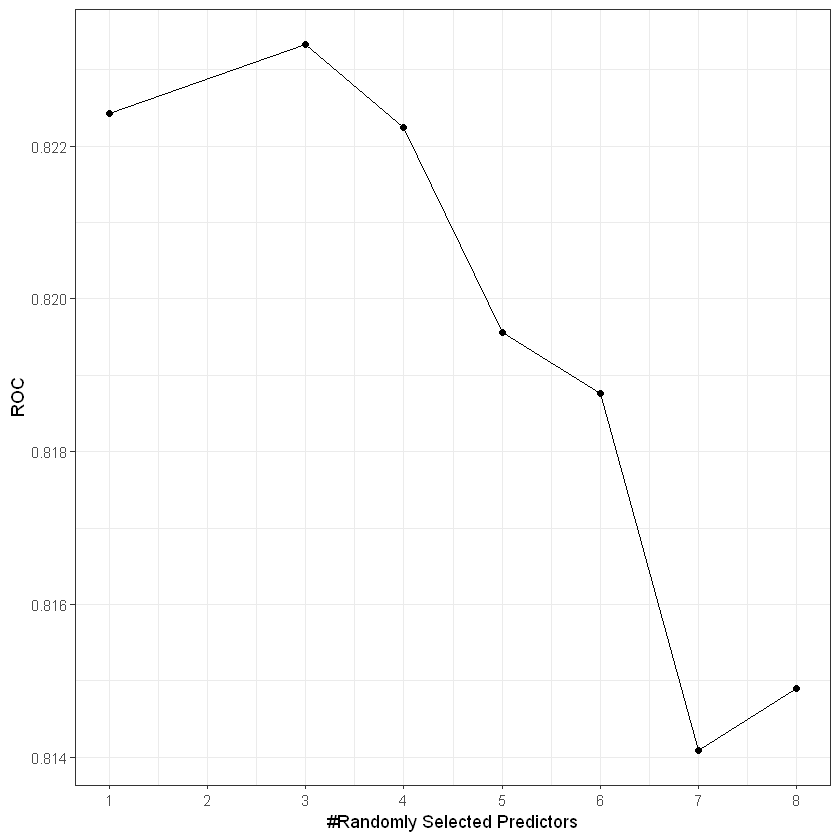

In [19]:
ggplot(rfmodel) + geom_line()+ theme_bw()+ scale_x_continuous(breaks = c(1,2,3,4,5,6,7,8))

In [20]:
rfOutcome <- predict(rfmodel, newdata = testSet)
str(rfOutcome)
rfProbs <- predict(rfmodel, newdata = testSet, type = "prob")
head(rfProbs)

confusionMatrix(data = rfOutcome, testSet$Outcome)

 Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 1 1 2 2 ...


,No,Yes
,<dbl>,<dbl>
1,0.416,0.584
2,0.428,0.572
3,0.362,0.638
4,0.478,0.522
5,0.306,0.694
6,0.256,0.744


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  128  29
       Yes  22  51
                                         
               Accuracy : 0.7783         
                 95% CI : (0.719, 0.8302)
    No Information Rate : 0.6522         
    P-Value [Acc > NIR] : 2.232e-05      
                                         
                  Kappa : 0.5011         
                                         
 Mcnemar's Test P-Value : 0.4008         
                                         
            Sensitivity : 0.8533         
            Specificity : 0.6375         
         Pos Pred Value : 0.8153         
         Neg Pred Value : 0.6986         
             Prevalence : 0.6522         
         Detection Rate : 0.5565         
   Detection Prevalence : 0.6826         
      Balanced Accuracy : 0.7454         
                                         
       'Positive' Class : No             
                                         

In [21]:
#logistic regression model
set.seed(125)
glm_model <-train(Outcome ~.-SNO, data = trainingSet , 
               method = "glm",
               trControl = train_control, 
               preProc = c("center", "scale"),
               metric="ROC")

# printing model performance metrics
# along with other details
print(glm_model)

+ Fold01.Rep1: parameter=none 
- Fold01.Rep1: parameter=none 
+ Fold02.Rep1: parameter=none 
- Fold02.Rep1: parameter=none 
+ Fold03.Rep1: parameter=none 
- Fold03.Rep1: parameter=none 
+ Fold04.Rep1: parameter=none 
- Fold04.Rep1: parameter=none 
+ Fold05.Rep1: parameter=none 
- Fold05.Rep1: parameter=none 
+ Fold06.Rep1: parameter=none 
- Fold06.Rep1: parameter=none 
+ Fold07.Rep1: parameter=none 
- Fold07.Rep1: parameter=none 
+ Fold08.Rep1: parameter=none 
- Fold08.Rep1: parameter=none 
+ Fold09.Rep1: parameter=none 
- Fold09.Rep1: parameter=none 
+ Fold10.Rep1: parameter=none 
- Fold10.Rep1: parameter=none 
+ Fold01.Rep2: parameter=none 
- Fold01.Rep2: parameter=none 
+ Fold02.Rep2: parameter=none 
- Fold02.Rep2: parameter=none 
+ Fold03.Rep2: parameter=none 
- Fold03.Rep2: parameter=none 
+ Fold04.Rep2: parameter=none 
- Fold04.Rep2: parameter=none 
+ Fold05.Rep2: parameter=none 
- Fold05.Rep2: parameter=none 
+ Fold06.Rep2: parameter=none 
- Fold06.Rep2: parameter=none 
+ Fold07

In [22]:
# Building the prediction model for logistic regression
glmOutcome <- predict(glm_model, newdata = testSet)
str(glmOutcome)
glmProbs <- predict(glm_model, newdata = testSet, type = "prob")
head(glmProbs)

confusionMatrix(data = glmOutcome, testSet$Outcome)

 Factor w/ 2 levels "No","Yes": 2 2 2 1 2 2 1 1 2 2 ...


,No,Yes
,<dbl>,<dbl>
1,0.3045740,0.6954260
2,0.2231260,0.7768740
3,0.1813367,0.8186633
4,0.5676111,0.4323889
5,0.3209057,0.6790943
6,0.2534184,0.7465816


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  134  36
       Yes  16  44
                                          
               Accuracy : 0.7739          
                 95% CI : (0.7143, 0.8263)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 4.208e-05       
                                          
                  Kappa : 0.4708          
                                          
 Mcnemar's Test P-Value : 0.008418        
                                          
            Sensitivity : 0.8933          
            Specificity : 0.5500          
         Pos Pred Value : 0.7882          
         Neg Pred Value : 0.7333          
             Prevalence : 0.6522          
         Detection Rate : 0.5826          
   Detection Prevalence : 0.7391          
      Balanced Accuracy : 0.7217          
                                          
       'Positive' Class : No              
                              

In [24]:
# Decisiton Tree Model
# Gradient boosting is a machine learning technique for regression and classification problems,
# which produces a prediction model in the form of an ensemble of weak prediction models, 
# typically decision trees.

#install.packages("gbm")
library(gbm)
set.seed(125)
gbm_model <-train(Outcome ~.-SNO, data = trainingSet , 
               method = "gbm",
               trControl = train_control, 
               preProc = c("center", "scale"),
               metric="ROC")

# printing model performance metrics
# along with other details
print(gbm_model)

+ Fold01.Rep1: shrinkage=0.009464, interaction.depth=9, n.minobsinnode=15, n.trees=4826 
Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2862             nan     0.0095    0.0031
     2        1.2790             nan     0.0095    0.0026
     3        1.2716             nan     0.0095    0.0026
     4        1.2655             nan     0.0095    0.0026
     5        1.2591             nan     0.0095    0.0019
     6        1.2532             nan     0.0095    0.0023
     7        1.2467             nan     0.0095    0.0026
     8        1.2403             nan     0.0095    0.0020
     9        1.2342             nan     0.0095    0.0024
    10        1.2285             nan     0.0095    0.0024
    20        1.1735             nan     0.0095    0.0020
    40        1.0807             nan     0.0095    0.0013
    60        1.0105             nan     0.0095    0.0011
    80        0.9535             nan     0.0095    0.0006
   100        0.9063             nan     

Selecting tuning parameters
Fitting n.trees = 4826, interaction.depth = 9, shrinkage = 0.00946, n.minobsinnode = 15 on full training set
Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2874             nan     0.0095    0.0031
     2        1.2805             nan     0.0095    0.0030
     3        1.2733             nan     0.0095    0.0032
     4        1.2656             nan     0.0095    0.0030
     5        1.2595             nan     0.0095    0.0025
     6        1.2529             nan     0.0095    0.0027
     7        1.2461             nan     0.0095    0.0026
     8        1.2398             nan     0.0095    0.0025
     9        1.2335             nan     0.0095    0.0026
    10        1.2277             nan     0.0095    0.0021
    20        1.1731             nan     0.0095    0.0021
    40        1.0820             nan     0.0095    0.0013
    60        1.0119             nan     0.0095    0.0007
    80        0.9573             nan     0.0095    

Stochastic Gradient Boosting 

538 samples
  9 predictor
  2 classes: 'No', 'Yes' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 484, 484, 484, 485, 484, 484, ... 
Resampling results across tuning parameters:

  shrinkage   interaction.depth  n.minobsinnode  n.trees  ROC        Sens     
  0.00946362  9                  15              4826     0.7821888  0.8085714
  0.36911518  9                  23              1783     0.7651295  0.7990476
  0.39265241  3                  17              1499     0.7427820  0.7790476
  Spec     
  0.5550682
  0.5571150
  0.5411306

ROC was used to select the optimal model using the largest value.
The final values used for the model were n.trees = 4826, interaction.depth =
 9, shrinkage = 0.00946362 and n.minobsinnode = 15.


In [25]:
# Building the prediction model for DT (Gradient Boosting)
gbmOutcome <- predict(gbm_model, newdata = testSet)
str(gbmOutcome)
gbmProbs <- predict(gbm_model, newdata = testSet, type = "prob")
head(gbmProbs)

confusionMatrix(data = gbmOutcome, testSet$Outcome)

 Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 1 1 1 2 ...


,No,Yes
,<dbl>,<dbl>
1,0.7057127542,0.2942872
2,0.1694875713,0.8305124
3,0.1229452619,0.8770547
4,0.7841698120,0.2158302
5,0.0009999095,0.9990001
6,0.0436698901,0.9563301


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  123  28
       Yes  27  52
                                          
               Accuracy : 0.7609          
                 95% CI : (0.7004, 0.8145)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 0.000245        
                                          
                  Kappa : 0.4714          
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.8200          
            Specificity : 0.6500          
         Pos Pred Value : 0.8146          
         Neg Pred Value : 0.6582          
             Prevalence : 0.6522          
         Detection Rate : 0.5348          
   Detection Prevalence : 0.6565          
      Balanced Accuracy : 0.7350          
                                          
       'Positive' Class : No              
                              

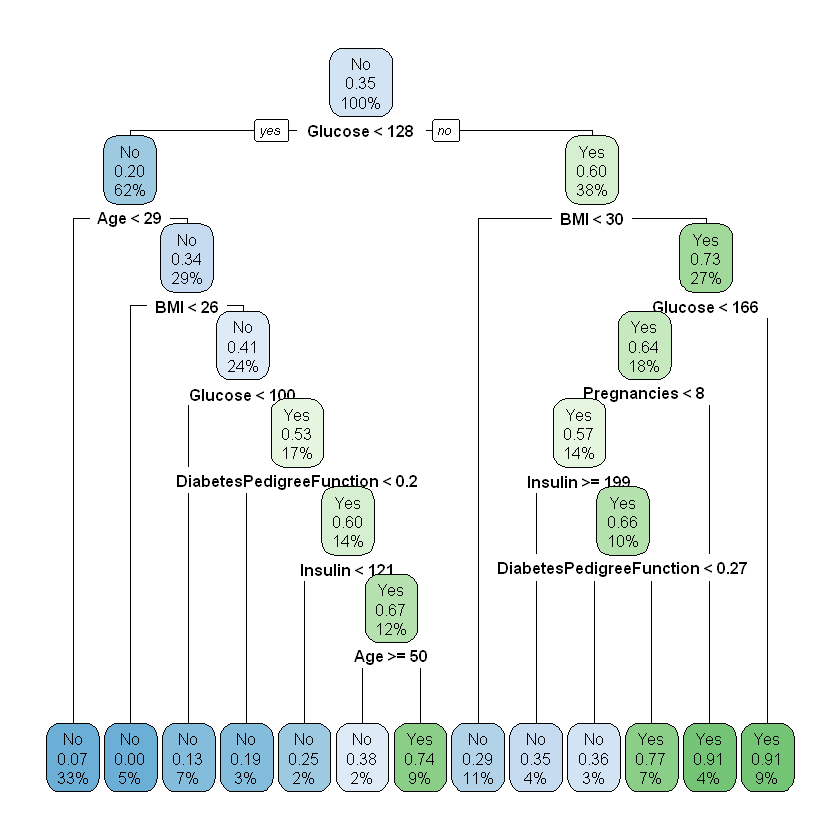

In [45]:
# Another way of handling Decision Tree is by using rpart function
library(rpart)
#install.packages("rpart.plot")
library(rpart.plot)
set.seed(125)
#suppose we wish to prune the tree we could use the option rpart.control
DT_fit_method2 = rpart(Outcome ~.-SNO, data = trainingSet , 
               method = "class",
                       control = rpart.control(minsplit=30))
rpart.plot(DT_fit_method2, cex = 0.8)

In [46]:
#now lets validate the model using Test data
DT_meth2_Pred = predict(DT_fit_method2, newdata = testSet,
                        type="class") # without the dependent column as best practice; Sourcing my model fit to it


confusionMatrix(data = DT_meth2_Pred, testSet$Outcome)


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  126  29
       Yes  24  51
                                          
               Accuracy : 0.7696          
                 95% CI : (0.7097, 0.8224)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 7.748e-05       
                                          
                  Kappa : 0.4846          
                                          
 Mcnemar's Test P-Value : 0.5827          
                                          
            Sensitivity : 0.8400          
            Specificity : 0.6375          
         Pos Pred Value : 0.8129          
         Neg Pred Value : 0.6800          
             Prevalence : 0.6522          
         Detection Rate : 0.5478          
   Detection Prevalence : 0.6739          
      Balanced Accuracy : 0.7388          
                                          
       'Positive' Class : No              
                              

In [30]:
# KNN model - non-parametric classification model
set.seed(125)
knn_model <-train(Outcome ~.-SNO, data = trainingSet , 
               method = "knn",
               trControl = train_control, 
               preProc = c("center", "scale"),
               metric="ROC")

# printing model performance metrics
# along with other details
print(knn_model)

+ Fold01.Rep1: k=125 
- Fold01.Rep1: k=125 
+ Fold01.Rep1: k=143 
- Fold01.Rep1: k=143 
+ Fold01.Rep1: k= 47 
- Fold01.Rep1: k= 47 
+ Fold02.Rep1: k=125 
- Fold02.Rep1: k=125 
+ Fold02.Rep1: k=143 
- Fold02.Rep1: k=143 
+ Fold02.Rep1: k= 47 
- Fold02.Rep1: k= 47 
+ Fold03.Rep1: k=125 
- Fold03.Rep1: k=125 
+ Fold03.Rep1: k=143 
- Fold03.Rep1: k=143 
+ Fold03.Rep1: k= 47 
- Fold03.Rep1: k= 47 
+ Fold04.Rep1: k=125 
- Fold04.Rep1: k=125 
+ Fold04.Rep1: k=143 
- Fold04.Rep1: k=143 
+ Fold04.Rep1: k= 47 
- Fold04.Rep1: k= 47 
+ Fold05.Rep1: k=125 
- Fold05.Rep1: k=125 
+ Fold05.Rep1: k=143 
- Fold05.Rep1: k=143 
+ Fold05.Rep1: k= 47 
- Fold05.Rep1: k= 47 
+ Fold06.Rep1: k=125 
- Fold06.Rep1: k=125 
+ Fold06.Rep1: k=143 
- Fold06.Rep1: k=143 
+ Fold06.Rep1: k= 47 
- Fold06.Rep1: k= 47 
+ Fold07.Rep1: k=125 
- Fold07.Rep1: k=125 
+ Fold07.Rep1: k=143 
- Fold07.Rep1: k=143 
+ Fold07.Rep1: k= 47 
- Fold07.Rep1: k= 47 
+ Fold08.Rep1: k=125 
- Fold08.Rep1: k=125 
+ Fold08.Rep1: k=143 
- Fold08.R

In [31]:
# Building the prediction model for KNN classifier
knnOutcome <- predict(knn_model, newdata = testSet)
str(knnOutcome)
knnProbs <- predict(knn_model, newdata = testSet, type = "prob")
head(knnProbs)

confusionMatrix(data = knnOutcome, testSet$Outcome)

 Factor w/ 2 levels "No","Yes": 2 2 1 1 2 2 1 1 2 1 ...


,No,Yes
,<dbl>,<dbl>
1,0.432,0.568
2,0.448,0.552
3,0.552,0.448
4,0.648,0.352
5,0.440,0.560
6,0.448,0.552


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  139  47
       Yes  11  33
                                          
               Accuracy : 0.7478          
                 95% CI : (0.6865, 0.8026)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 0.001163        
                                          
                  Kappa : 0.379           
                                          
 Mcnemar's Test P-Value : 4.312e-06       
                                          
            Sensitivity : 0.9267          
            Specificity : 0.4125          
         Pos Pred Value : 0.7473          
         Neg Pred Value : 0.7500          
             Prevalence : 0.6522          
         Detection Rate : 0.6043          
   Detection Prevalence : 0.8087          
      Balanced Accuracy : 0.6696          
                                          
       'Positive' Class : No              
                              

In [47]:
attributes(rfmodel)

# the final model from the underlying package used by caret are displayed here
cat("--------Random Forest Final Model ")

rfmodel$finalModel

cat("--------Logistic Regression Final Model \n")

glm_model$finalModel

#attributes(glm_model)

cat("--------Decision Tree (method 1) a.k.a Gradient Boosting Machine Final Model \n")

gbm_model$finalModel

cat("--------Decision Tree (method 2)\n")

DT_fit_method2$finalModel

cat("--------knn classifier Final Model \n")

knn_model$finalModel


$names
 [1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      
[21] "terms"        "coefnames"    "xlevels"     

$class
[1] "train"         "train.formula"

--------Random Forest Final Model 


Call:
 randomForest(x = x, y = y, ntree = 500, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 25.46%
Confusion matrix:
     No Yes class.error
No  290  60   0.1714286
Yes  77 111   0.4095745

--------Logistic Regression Final Model 



Call:  NULL

Coefficients:
             (Intercept)                   Glucose             BloodPressure  
                -0.85240                   1.11539                   0.01300  
           SkinThickness                   Insulin                       BMI  
                 0.07065                  -0.16419                   0.64165  
DiabetesPedigreeFunction                       Age               Pregnancies  
                 0.25040                   0.09927                   0.46736  

Degrees of Freedom: 537 Total (i.e. Null);  529 Residual
Null Deviance:	    696.3 
Residual Deviance: 505.3 	AIC: 523.3

--------Decision Tree (method 1) a.k.a Gradient Boosting Machine Final Model 


A gradient boosted model with bernoulli loss function.
4826 iterations were performed.
There were 8 predictors of which 8 had non-zero influence.

--------Decision Tree (method 2)


NULL

--------knn classifier Final Model 


125-nearest neighbor model
Training set outcome distribution:

 No Yes 
350 188 


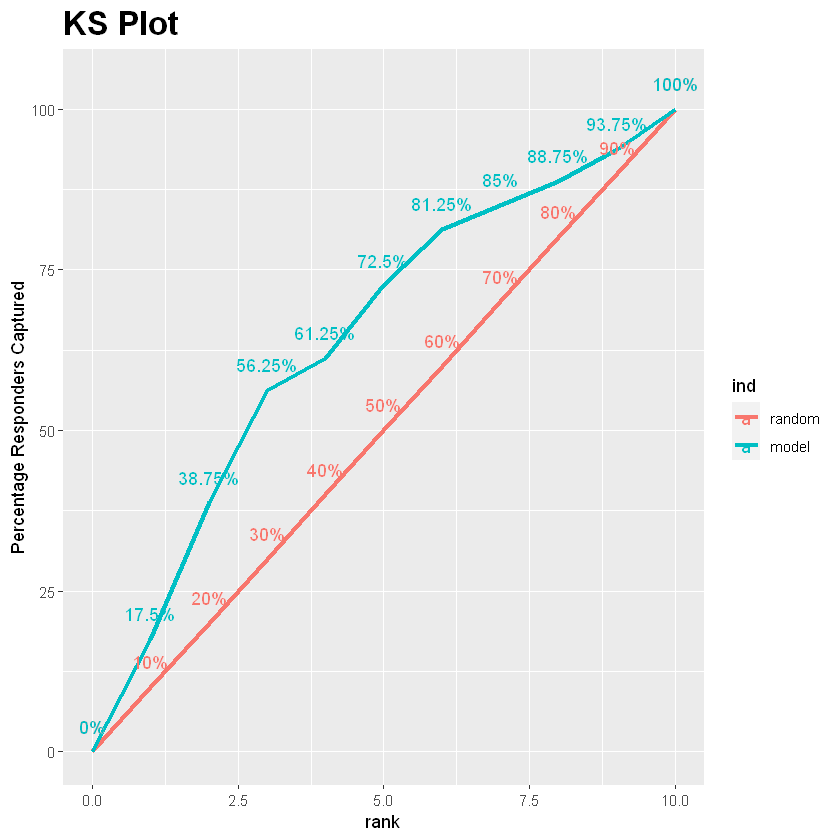

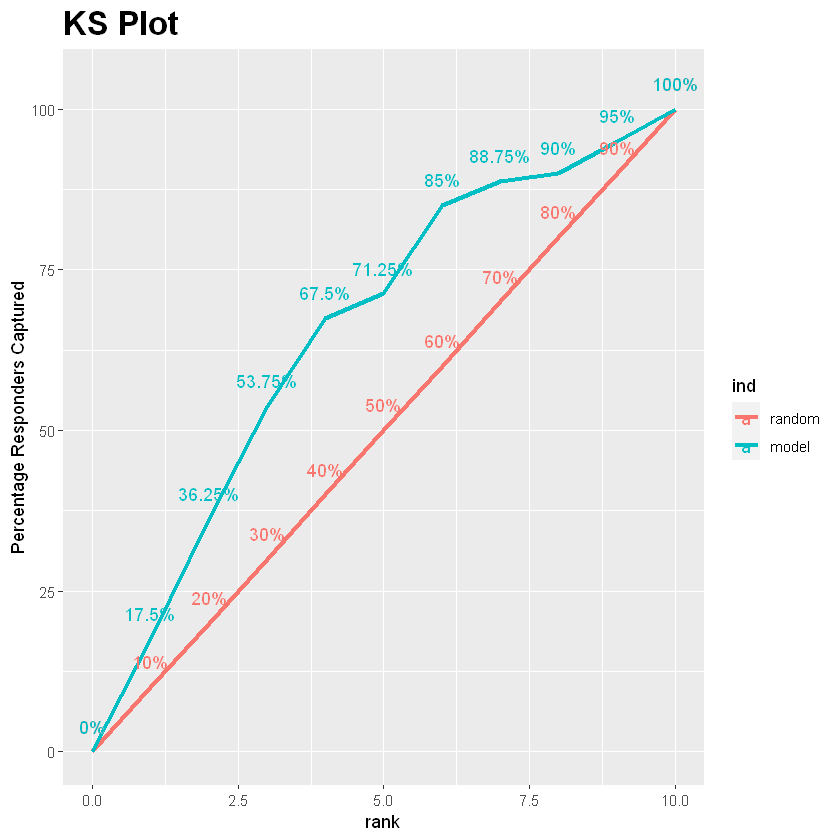

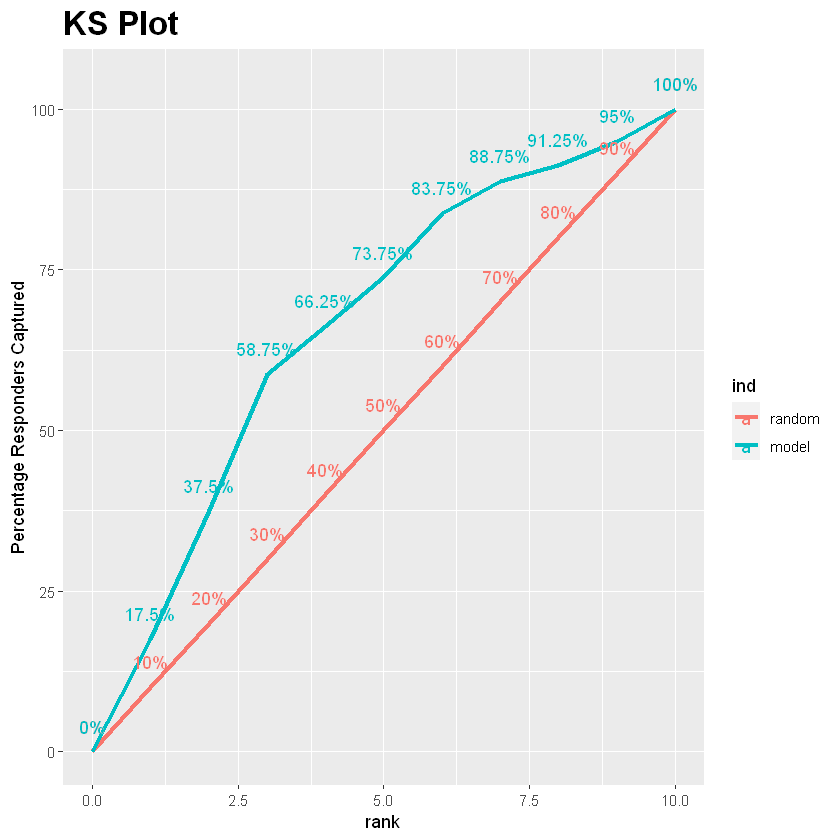

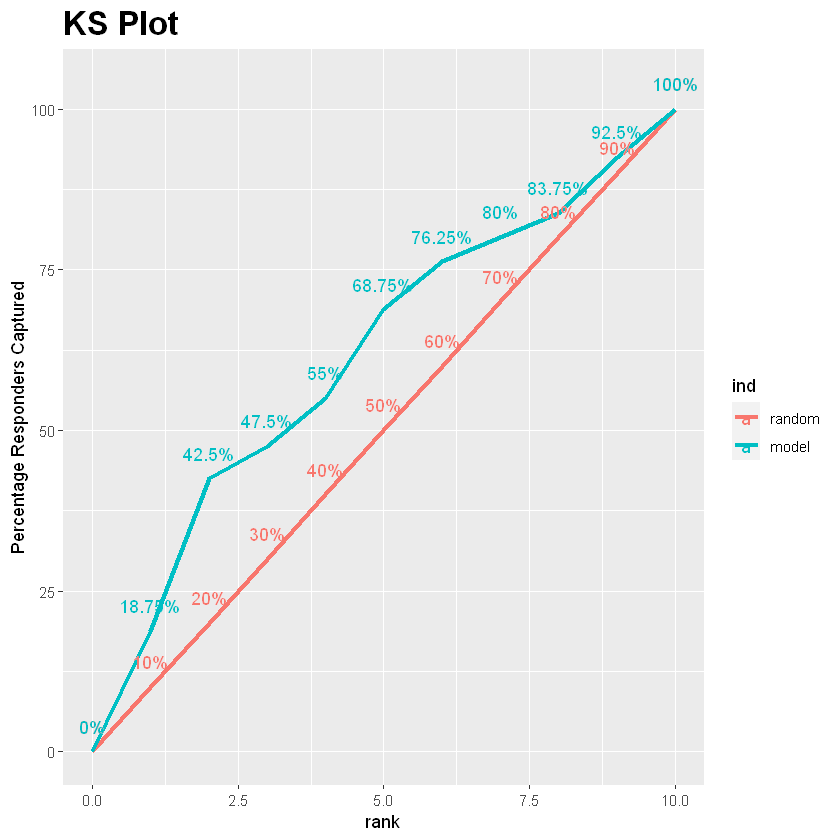

In [61]:
# similar to ROC curve even KS Plot is a good measure to check model's performance
# the cumulative percentage of responders (ones) captured by the model against the expected cumulative percentage
# of responders at random (i.e. had there been no model). 
# The greater the distance between the random and model cumulatives, the better is the predictive ability of the model
# to effectively capture the responders (ones).

ks_plot(actuals=as.numeric(testSet$Outcome),
predictedScores=as.numeric(glmOutcome)) # the plot is better than random chance - so a good logistic model

ks_plot(actuals=as.numeric(testSet$Outcome),
predictedScores=as.numeric(gbmOutcome)) # the plot is better than random chance - so a good DT model

ks_plot(actuals=as.numeric(testSet$Outcome),
predictedScores=as.numeric(rfOutcome)) # the plot is better than random chance - so a good RF model

ks_plot(actuals=as.numeric(testSet$Outcome),
predictedScores=as.numeric(knnOutcome)) # the plot is better than random chance - so a good KNN model


In [51]:
# Compare the models (descriptive stats)
resamps <- resamples(list(RF=rfmodel, GLM = glm_model, GBM = gbm_model, KNN = knn_model)) # add all the models checked in this line to compare them
summary(resamps)
#attributes(resamps)



Call:
summary.resamples(object = resamps)

Models: RF, GLM, GBM, KNN 
Number of resamples: 30 

ROC 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
RF  0.6210526 0.7787594 0.8368421 0.8233333 0.8771617 0.9240602    0
GLM 0.6285714 0.7827068 0.8225564 0.8282261 0.8849624 0.9383459    0
GBM 0.5969925 0.7315789 0.7721805 0.7821888 0.8348997 0.9127820    0
KNN 0.6000000 0.7874060 0.8293233 0.8208382 0.8751880 0.9323308    0

Sens 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
RF  0.6285714 0.8000000 0.8571429 0.8409524 0.8857143 0.9714286    0
GLM 0.7428571 0.8285714 0.8857143 0.8752381 0.9142857 0.9714286    0
GBM 0.6571429 0.7714286 0.8142857 0.8085714 0.8500000 0.9714286    0
KNN 0.8285714 0.9142857 0.9428571 0.9409524 0.9714286 1.0000000    0

Spec 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
RF  0.3157895 0.5263158 0.5950292 0.5975634 0.6710526 0.7894737    0
GLM 0.3157895 0.4802632 0.5409357 0.5585770 0.6315789 0.

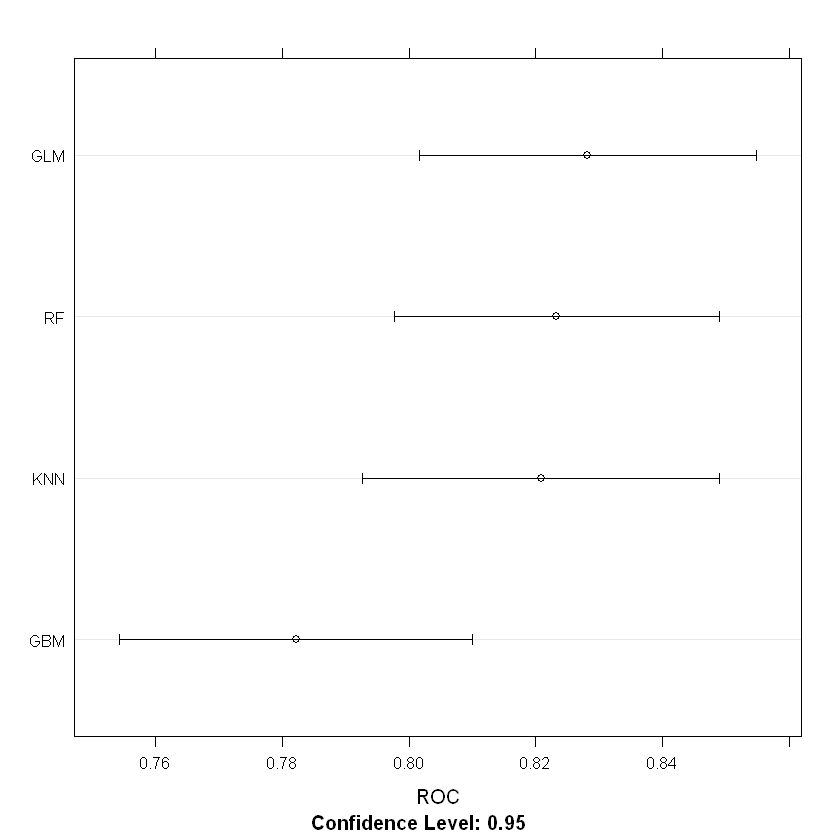

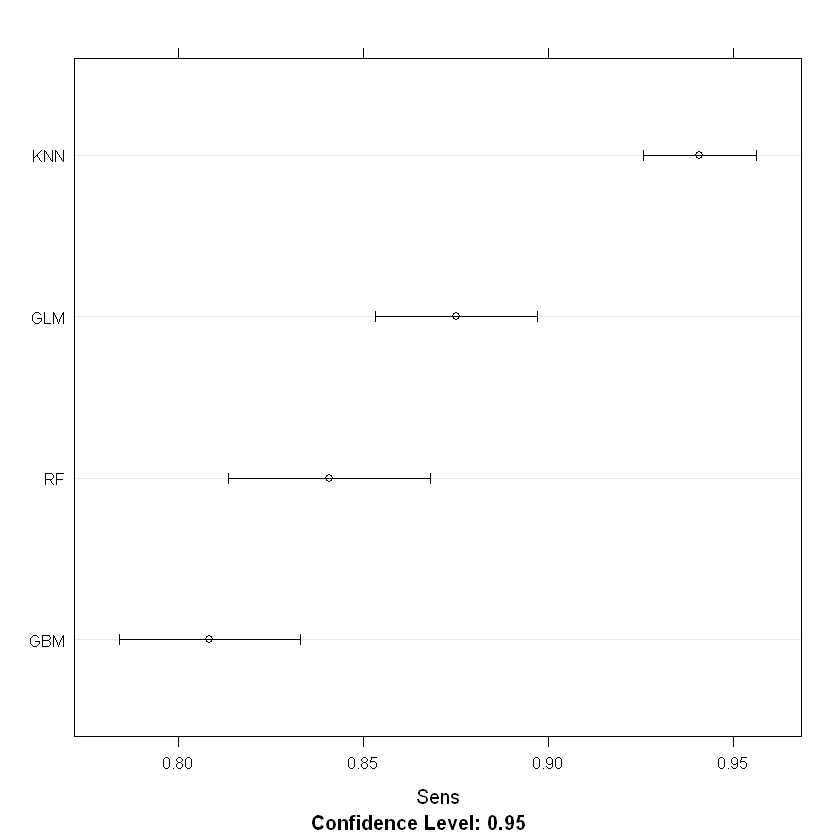

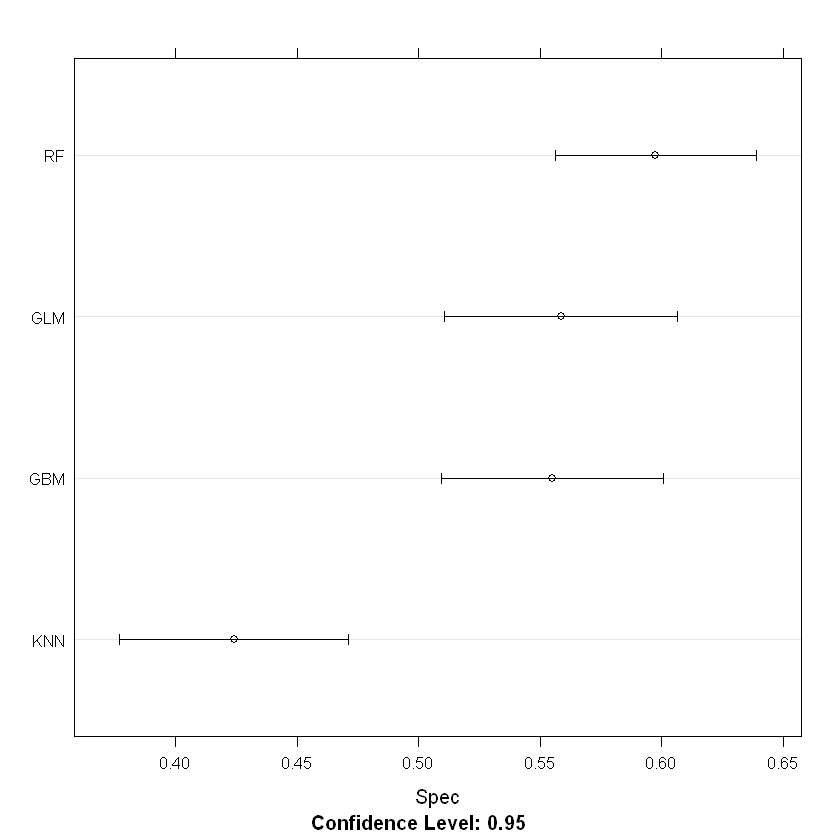

In [62]:
# compare the models visually
trellis.par.set(caretTheme())
dotplot(resamps, metric = "ROC")  # comparison of ROC metric
# Logistic Regression performs best among these just based on ROC; 
# but pls note these are based on mean values. when we look at the median above, RF is better in ROC metric.
# We should prefer median central tendency over mean because outliers tend to dictate mean. 
# So RF is the best one based on ROC even if visually it is not the best. 

dotplot(resamps, metric = "Sens")
# KNN performs best among these just based on Sensitivity

dotplot(resamps, metric = "Spec")
# Random forest performs best among these just based on Specificity




Balanced accuracy is a metric that one can use when evaluating how good a binary classifier is. It is especially useful when the classes are imbalanced, i.e. one of the two classes appears a lot more often than the other. This happens often in many settings such as anomaly detection and the presence of a disease.

Balanced accuracy is based on two more commonly used metrics: sensitivity (also known as true positive rate or recall) and specificity (also known as true negative rate, or 1 – false positive rate). 
Sensitivity answers the question ~ how many of the truly positive cases are found.
Specificity answers that same question but for the negative cases.

Since BA metric encompasses both , we are choosing that as our metric for now .

### So depending on what is more important (metric) to us for the biz decision, we can choose that as our model to predict .

If specificity was more important to us we should avoid knn as it produced the worst value (0.42 or 42%) and actually choose RF model with a (0.595 or 59.5% specificity ); If sensitivity was more important to us we should choose knn algorithm for this data as it hadthe highest value  (0.94 or 94%) among the different models.

# Among all the balanced accuracies, RF model performed best (74.54%), so lets choose as our model for predictions, assuming we wanted a good model for all purposes.

Please note that we didnt tweak much of the hyperparameters. Had we done that the GBM model would have probably given
a better metric than the one now.


In [63]:
# export the dataset for tableau purposes
write_csv(ds1_diabds_mod2,"I:/DSforR/capstone/tableau_hg_input.csv", na='')